## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

In [2]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"seoul_covid_6_27_.csv"
file_name

'seoul_covid_6_27_.csv'

In [3]:
# read_csv 로 csv 파일을 불러와 주세요.
df = pd.read_csv(file_name)
df.shape

(1298, 7)

In [4]:
# "연번"을 기준으로 역순으로 정렬합니다.
df = df.sort_values(["연번"], ascending=False)

In [5]:
# head 로 미리보기를 합니다.
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1298,12696,6.27.,송파구,-,강남구 역삼동 모임,서울대학병원
1,1297,12693,6.27.,영등포구,-,확인 중,서남병원
2,1296,12694,6.27.,관악구,-,확인 중,강남성심병원
3,1295,12690,6.27.,관악구,-,왕성교회 관련,서남병원
4,1294,12688,6.27.,관악구,-,왕성교회 관련,서남병원


In [6]:
# tail 로 미리보기를 합니다.
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1293,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1294,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1295,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1296,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1297,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [7]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

### 시각화 선명하게 설정하기

In [8]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 확진일

In [9]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일"].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.20.     1
4.15.     1
1.24.     1
5.9.      1
5.31.     1
Name: 확진일, Length: 128, dtype: int64

In [10]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일"].head(1)

0    6.27.
Name: 확진일, dtype: object

In [11]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.
df["확진일자"] = pd.to_datetime("2020"+ "-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

0   2020-06-27
1   2020-06-27
2   2020-06-27
3   2020-06-27
4   2020-06-27
Name: 확진일자, dtype: datetime64[ns]

In [12]:
# 월만 추출합니다.
df["월"] = df["확진일자"].dt.month

In [13]:
# 해당 연도의 몇번째 "주"인지 추출합니다.
df["주"] = df["확진일자"].dt.week
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주
0,1298,12696,6.27.,송파구,-,강남구 역삼동 모임,서울대학병원,2020-06-27,6,26


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

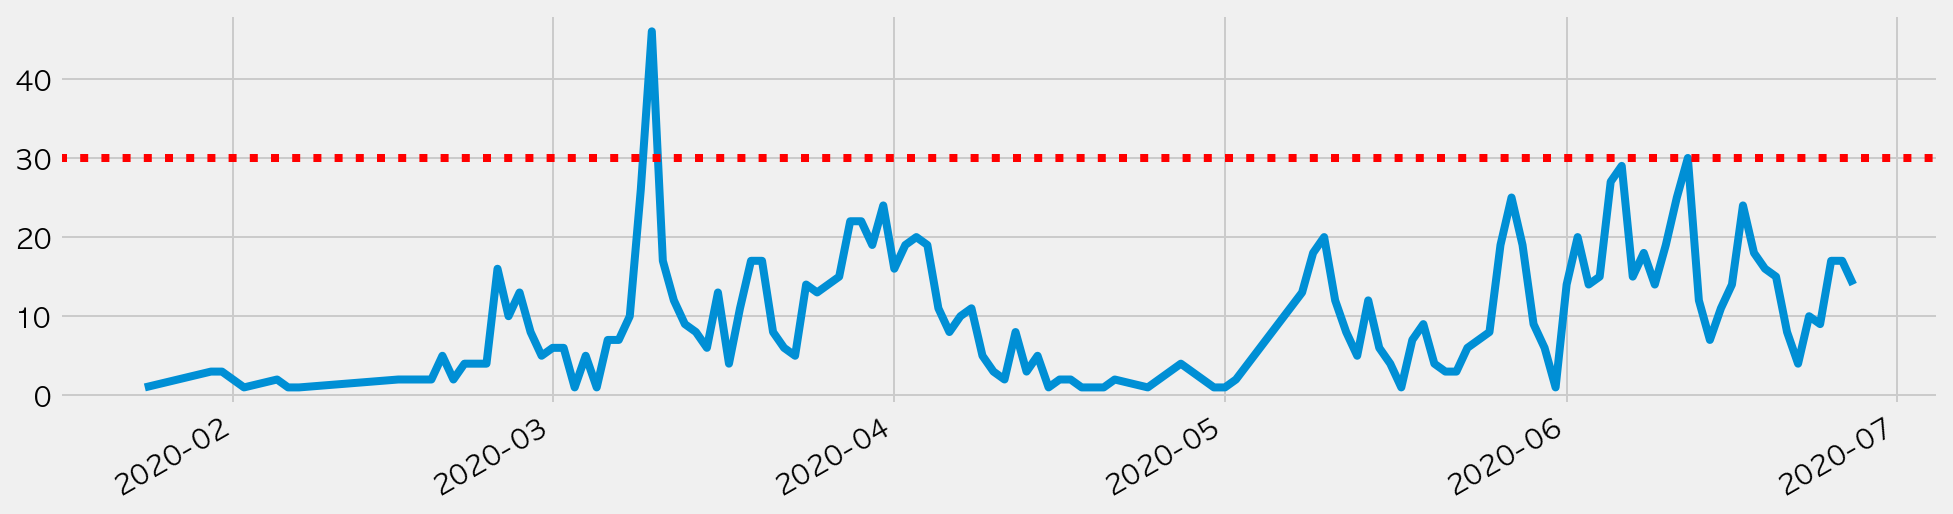

In [14]:
# 확진일자로 선그래프를 그립니다.
df["확진일자"].value_counts().sort_index().plot(
    figsize=(15, 4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

### 선그래프에 값 표시하기

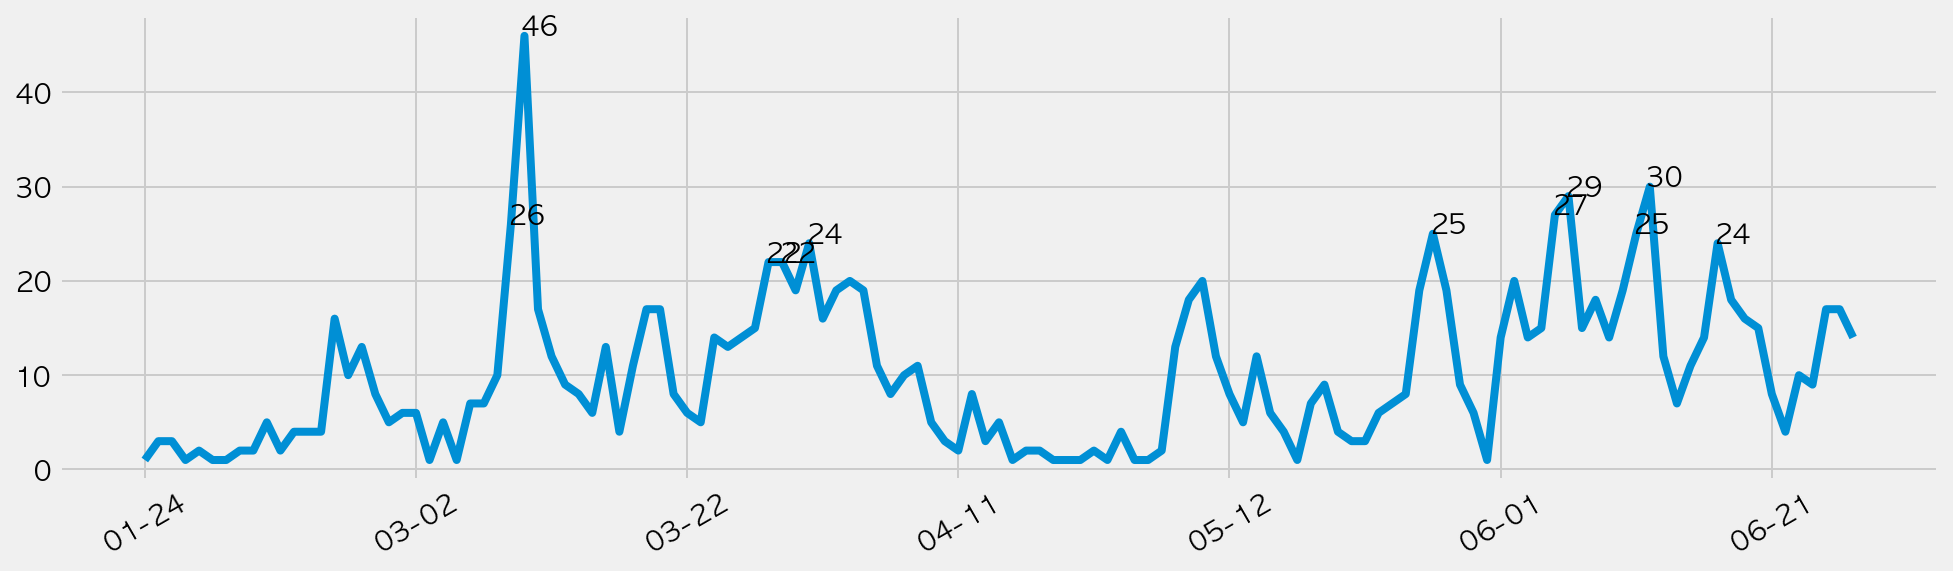

In [15]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
g = day_count.plot(figsize=(15, 4), rot=30)


for i in range(len(day_count)):
    case_count = day_count.iloc[i] 
    if case_count > 20:
        g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

### 확진자가 가장 많이 나온 날

In [16]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.
day_count.describe()

count    127.000000
mean      10.220472
std        8.000906
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [17]:
# 확진자가 가장 많았던 날을 찾습니다.
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [18]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.
df[df["월일"] == "03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1096,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1097,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1098,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1099,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1100,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


### 막대그래프 그리기

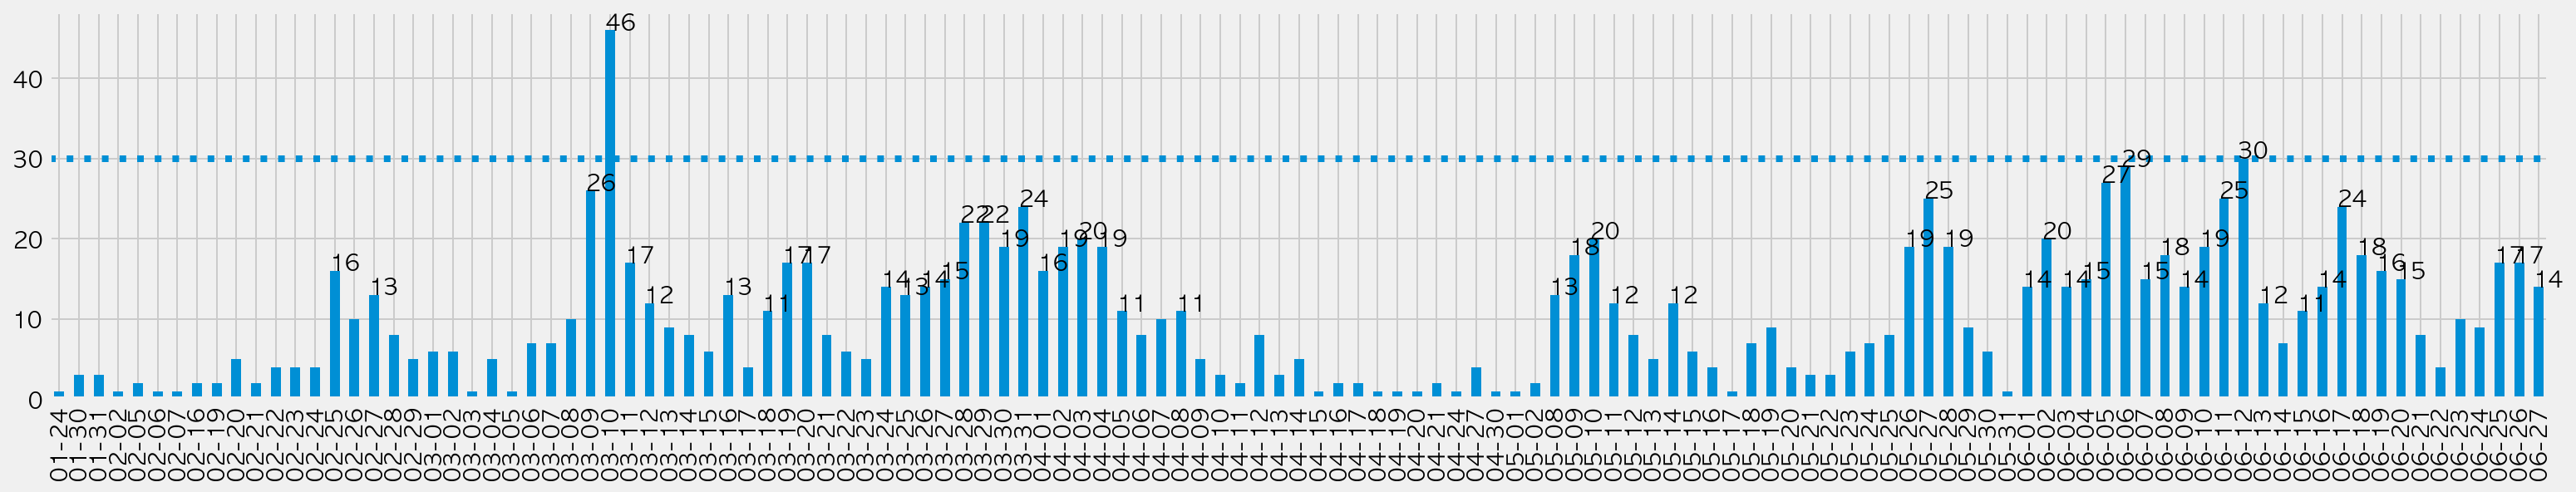

In [19]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
g = day_count.plot.bar(figsize=(24, 4))
g.axhline(30, linestyle=":")

for i in range(len(day_count)):
    case_count = day_count.iloc[i] 
    if case_count > 10:
        g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

### 최근 데이터만 슬라이싱으로 나눠 그리기

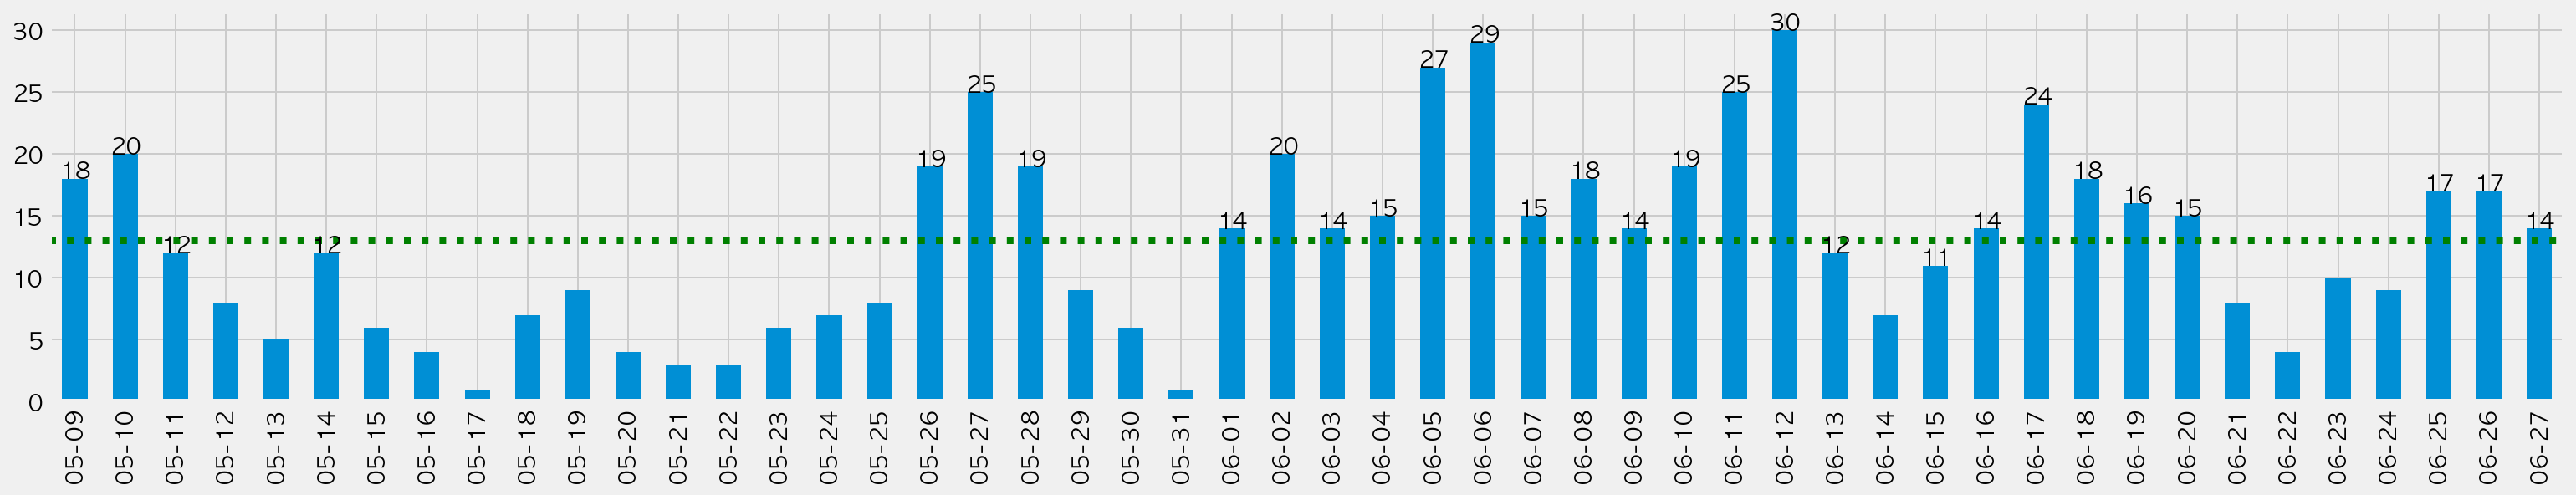

In [20]:
# 슬라이싱을 통해 최근 데이터만 그립니다.
day_count_last = day_count[-50:]
g = day_count_last.plot.bar(figsize=(24, 4))
g.axhline(day_count_last.median(), linestyle=":", color="green")
for i in range(len(day_count_last)):
    case_count = day_count_last.iloc[i] 
    if case_count > 10:
        g.text(x=i-0.3, y=day_count_last.iloc[i], s=day_count_last.iloc[i])

### 월별 확진자 수 그리기

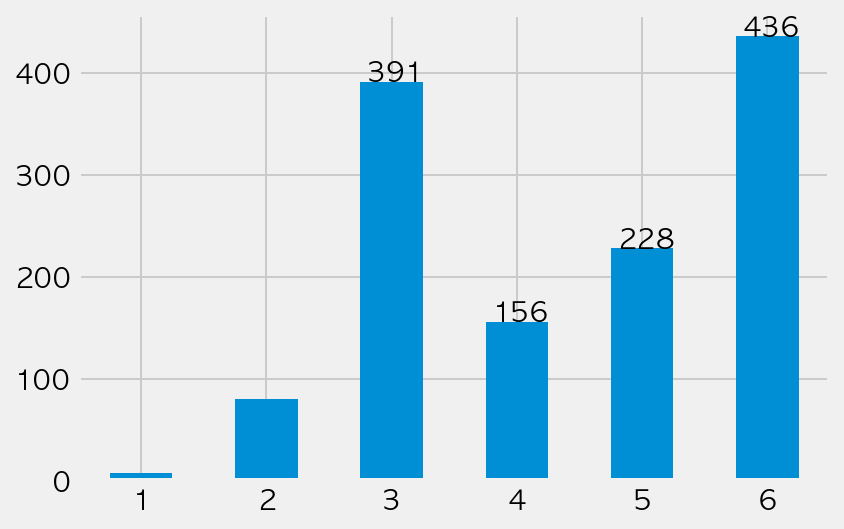

In [21]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    month_case_i = month_case.iloc[i] 
    if month_case_i > 100:
        g.text(x=month_case.index[i] - 1.2, y=month_case_i, s=month_case_i)

### 주단위 확진자수 그리기

In [22]:
# 주별로 빈도수를 구합니다.
weekly_case = df["주"].value_counts().sort_index()
weekly_case.head()

4     1
5     7
6     4
7     2
8    17
Name: 주, dtype: int64

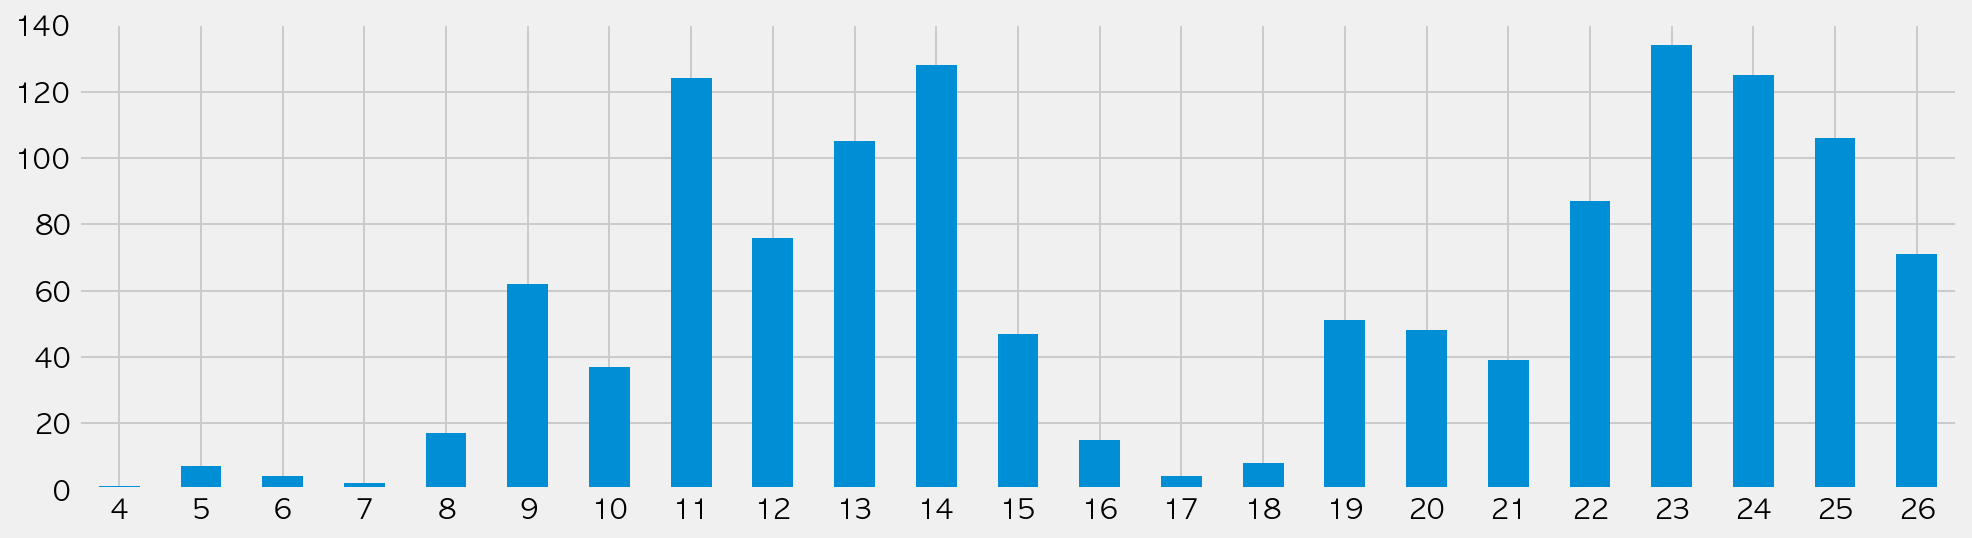

In [23]:
# 주단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(rot=0, figsize=(15, 4))

### 월-주 함께 그리기

In [24]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.
month_weekly_case = df.groupby(["월", "주"])["연번"].count()
month_weekly_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     71
Name: 연번, dtype: int64

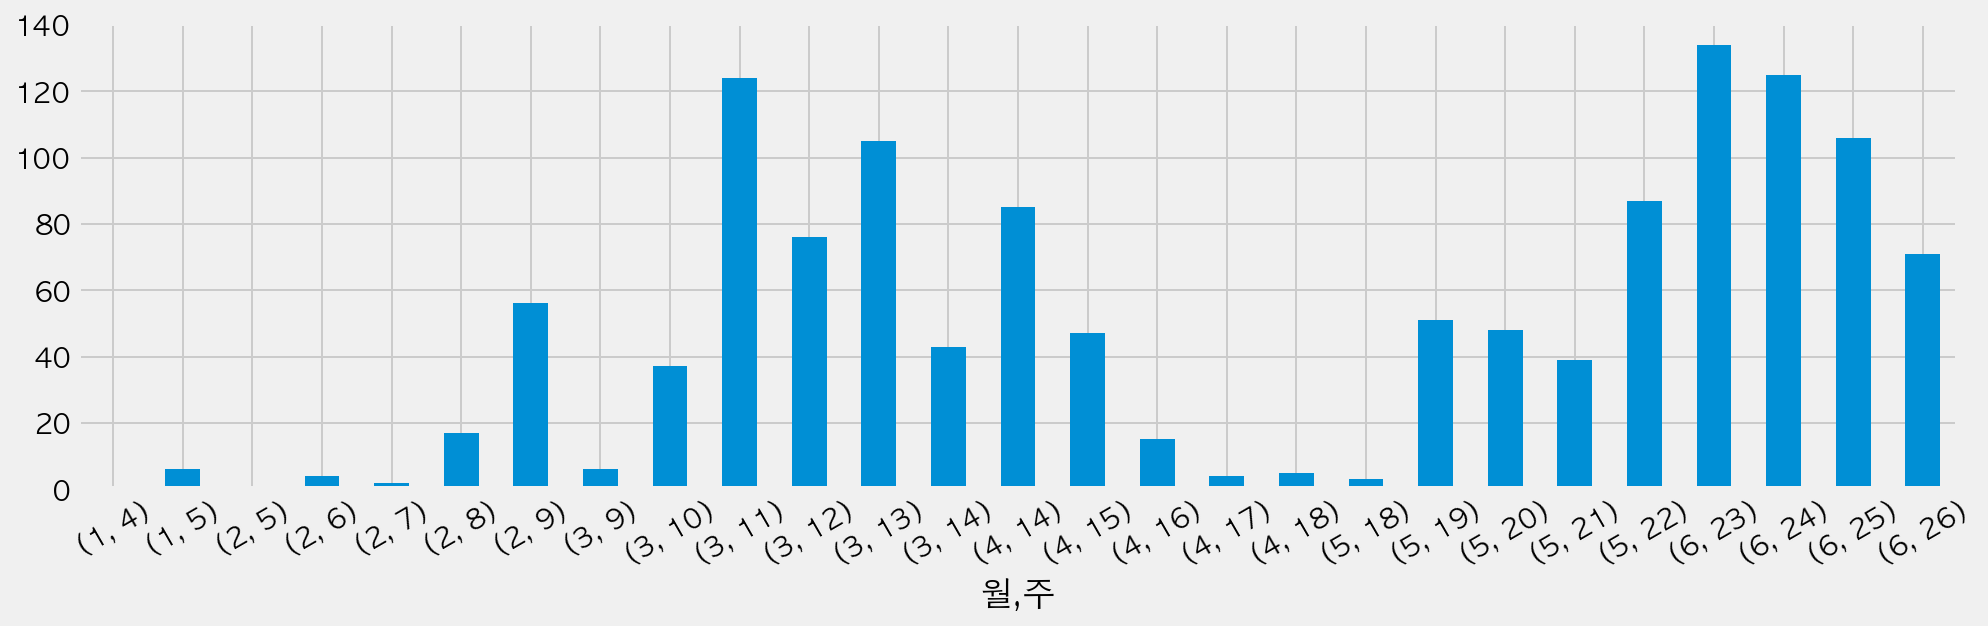

In [25]:
# 월-주 를 함께 그래프에 표현하기
month_weekly_case.plot.bar(figsize=(15, 4), rot=30)

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [26]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[0]["확진일자"]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-06-27 00:00:00'))

In [27]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [28]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
days = pd.DataFrame({"확진일자": days})
days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [29]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case.head()

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
Name: 확진일자, dtype: int64

In [30]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
daily_case = daily_case.to_frame()
daily_case.head()

,확진일자
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [31]:
# value_counts 결과를 
daily_case.columns = ["확진수"]
daily_case.head()

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [32]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
all_day = days.merge(daily_case, left_on="확진일자", right_on=daily_case.index, how="left")
all_day = all_day.rename(columns={"연번":"확진수"})
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


## 누적 확진자 수 구하기

In [33]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
151,2020-06-23,10.0,1241.0
152,2020-06-24,9.0,1250.0
153,2020-06-25,17.0,1267.0
154,2020-06-26,17.0,1284.0


In [34]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x: x[-5:])
all_day["일자"].head()

0    01-24
1    01-25
2    01-26
3    01-27
4    01-28
Name: 일자, dtype: object

In [35]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day.set_index("일자")
cum_day = cum_day[["확진수", "누적확진"]]
cum_day

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
06-23,10.0,1241.0
06-24,9.0,1250.0
06-25,17.0,1267.0


### 데이터프레임으로 그리기

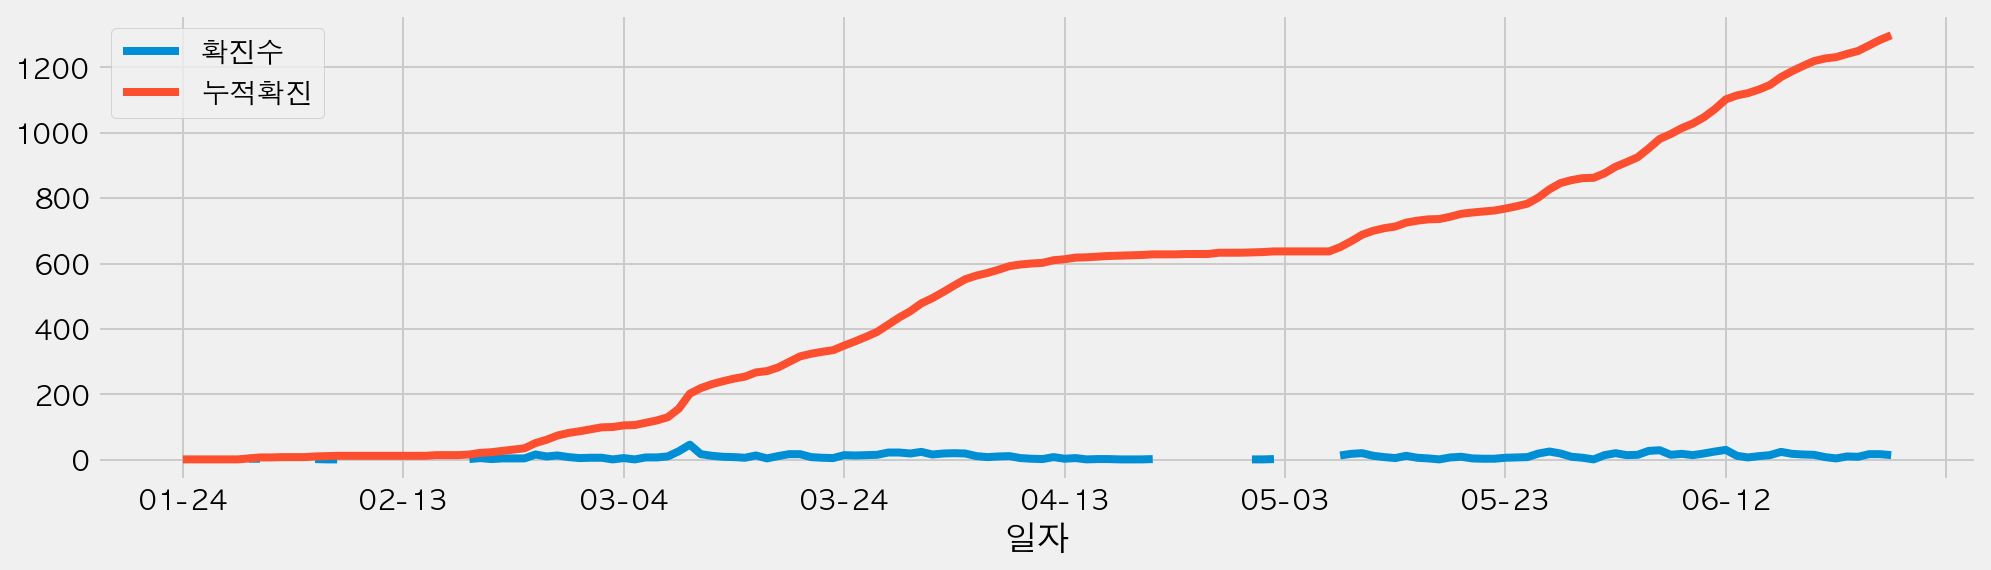

In [36]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.
cum_day.plot(figsize=(15, 4))

### 시리즈로 그리기

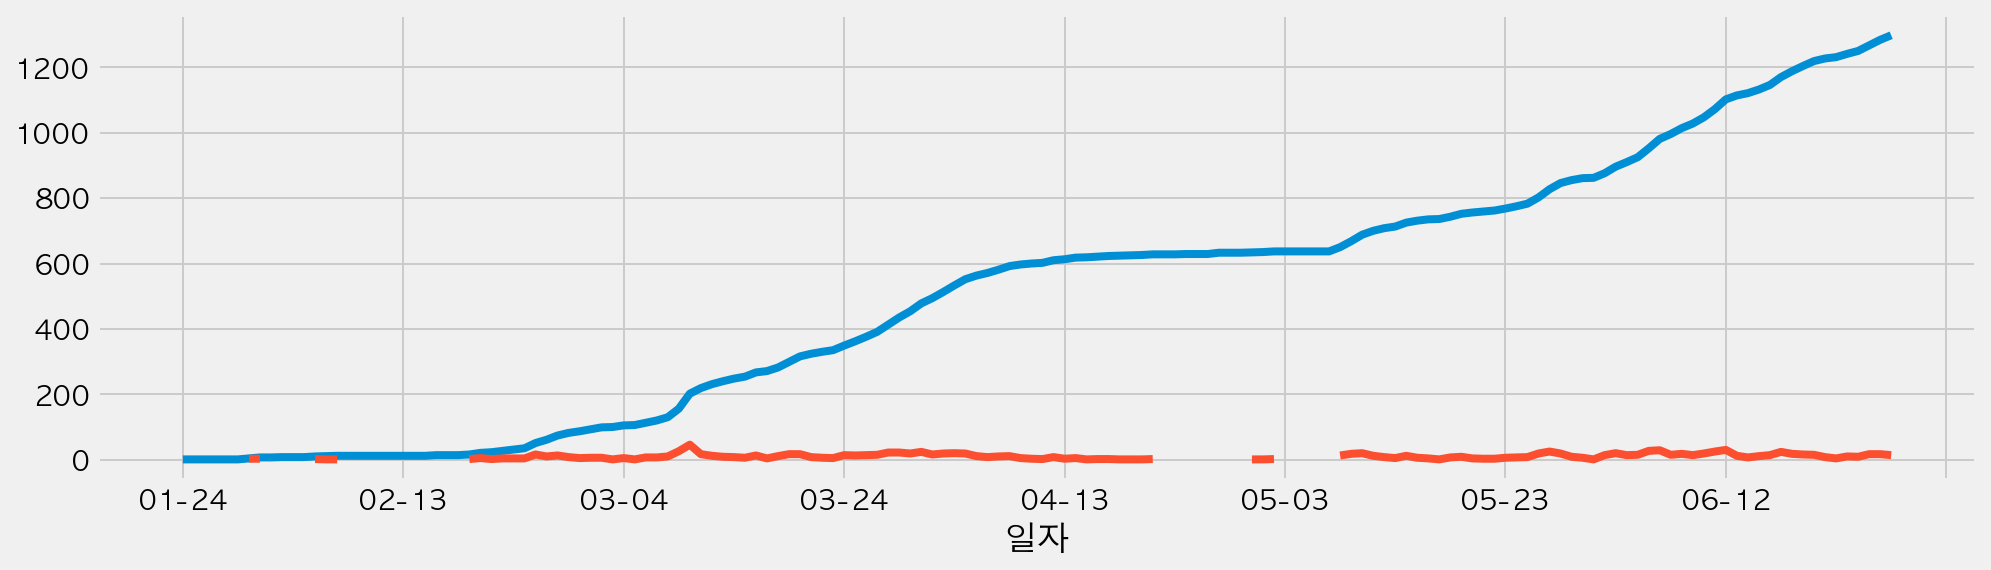

In [37]:
# 시리즈로 2개의 그래프 그리기
cum_day["누적확진"].plot(label="누적확진", figsize=(15, 4))
cum_day["확진수"].plot(label="확진수", figsize=(15, 4))

### 확진수만 따로 그리기

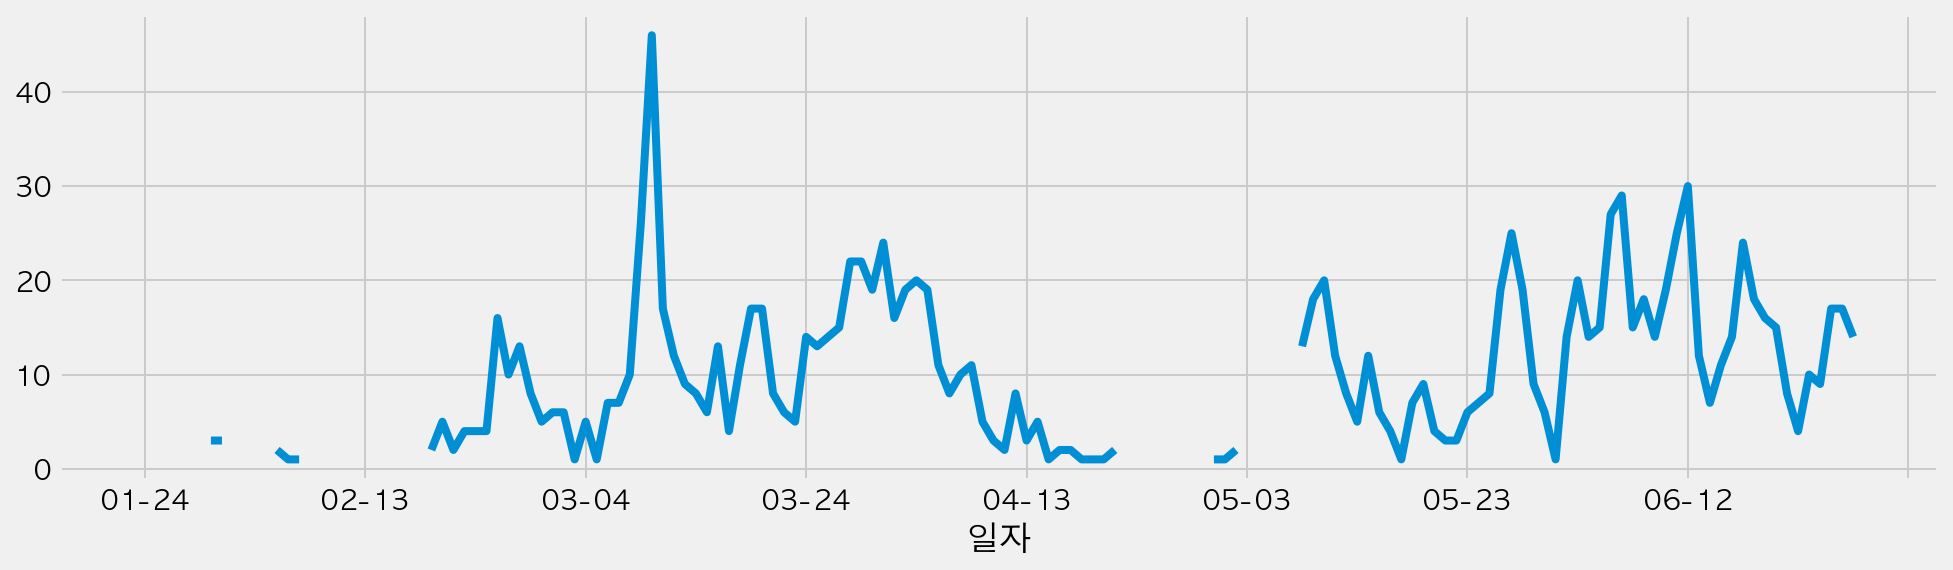

In [38]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
cum_day["확진수"].plot(figsize=(15, 4))

### 누적확진만 따로 그리기

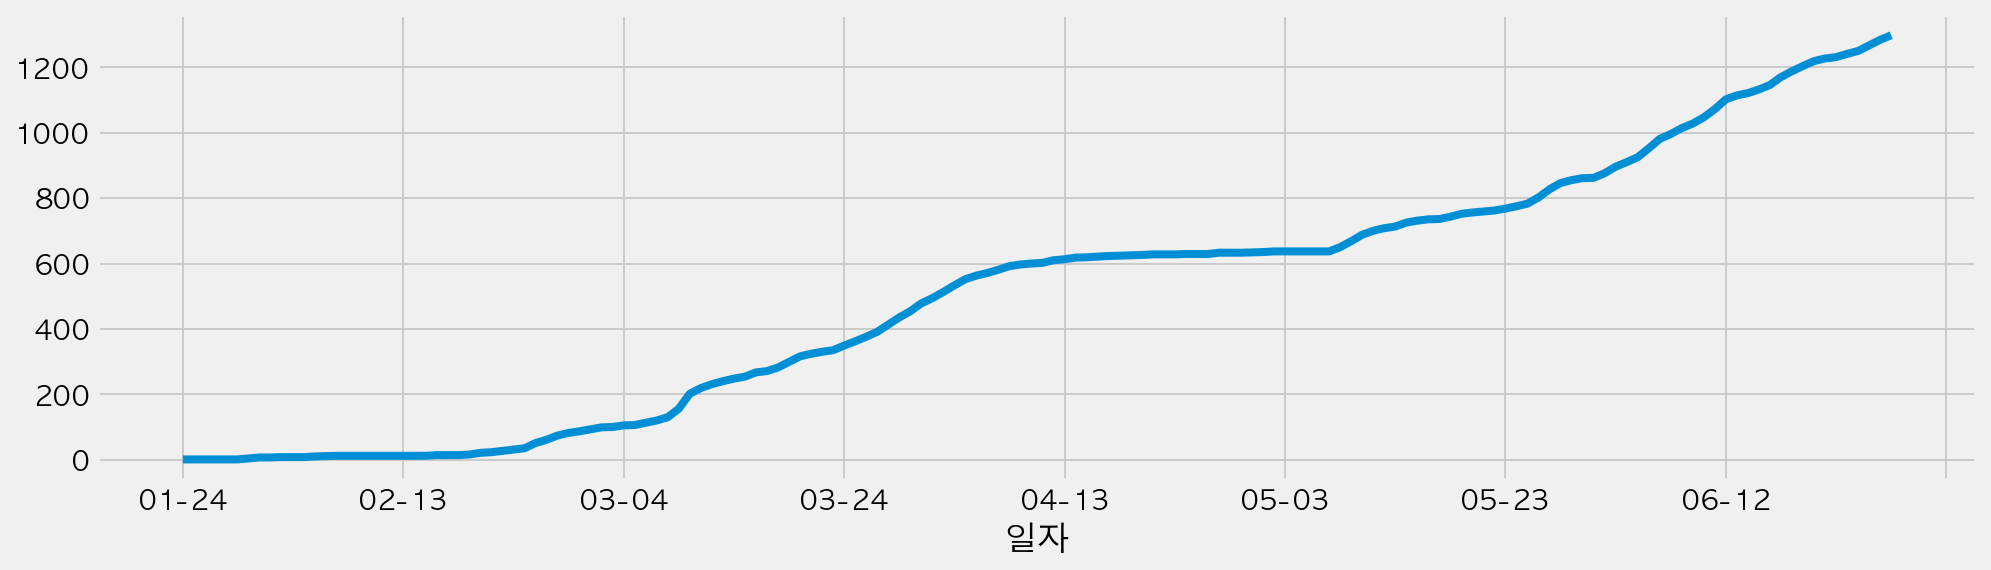

In [39]:
# 누적확진만 따로 그립니다.
cum_day["누적확진"].plot(figsize=(15, 4))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

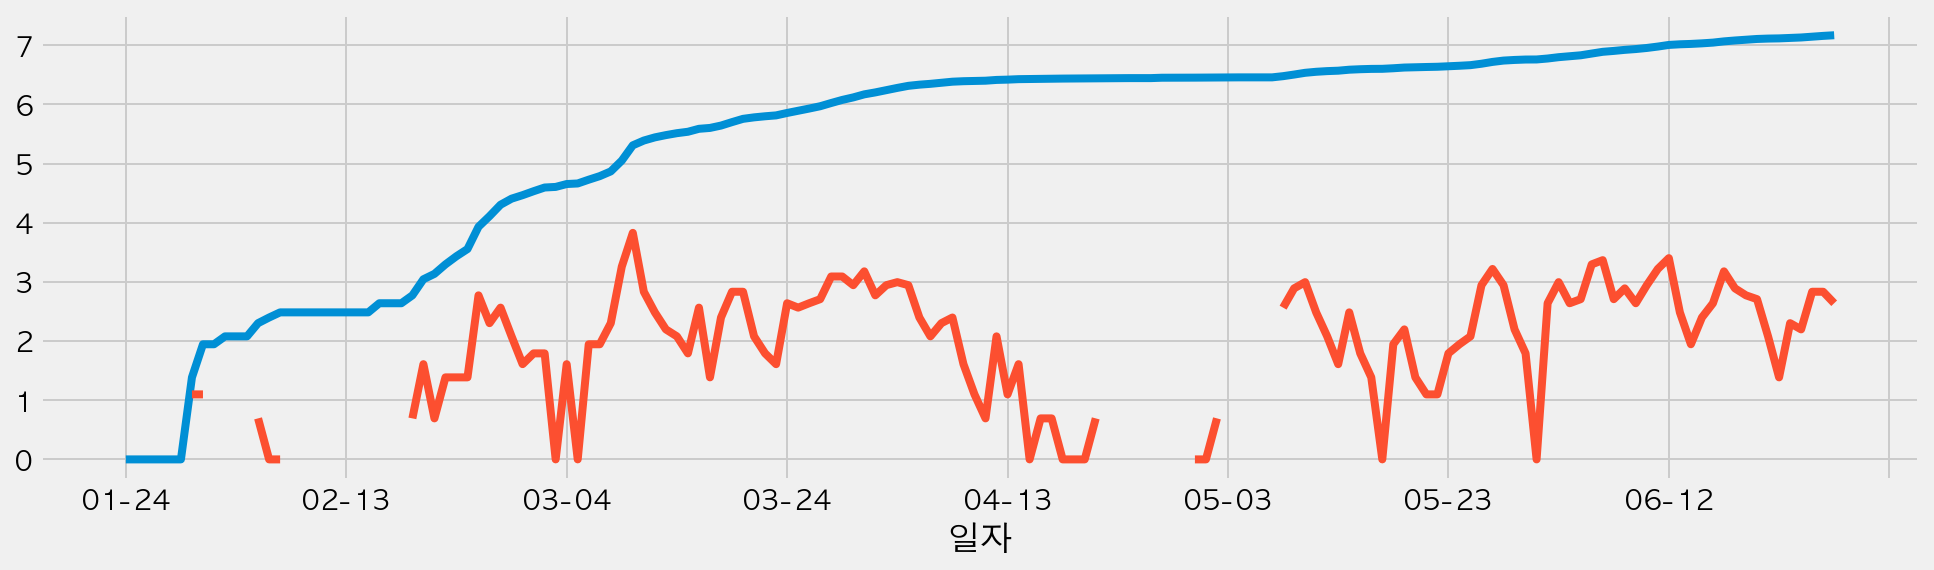

In [40]:
np.log(cum_day["누적확진"]).plot(figsize=(15, 4))
np.log(cum_day["확진수"]).plot(figsize=(15, 4))

### 확진월과 요일 구하기

In [41]:
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


## 요일별 확진 수 

In [42]:
# 월별, 요일별 확진수를 groupby로 구하기
all_day_week = all_day.groupby(
    ["확진월", "확진요일"])["확진수"].sum().unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,47,58,66,75,90,70,30


In [43]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [44]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,47,58,66,75,90,70,30


In [45]:
# style.background_gradient 로 색상을 표현합니다.
all_day_week.style.background_gradient(cmap='Blues')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,47,58,66,75,90,70,30


## 거주지별 확진자

In [46]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    112
구로구     85
강남구     83
강서구     78
양천구     70
Name: 거주지, dtype: int64

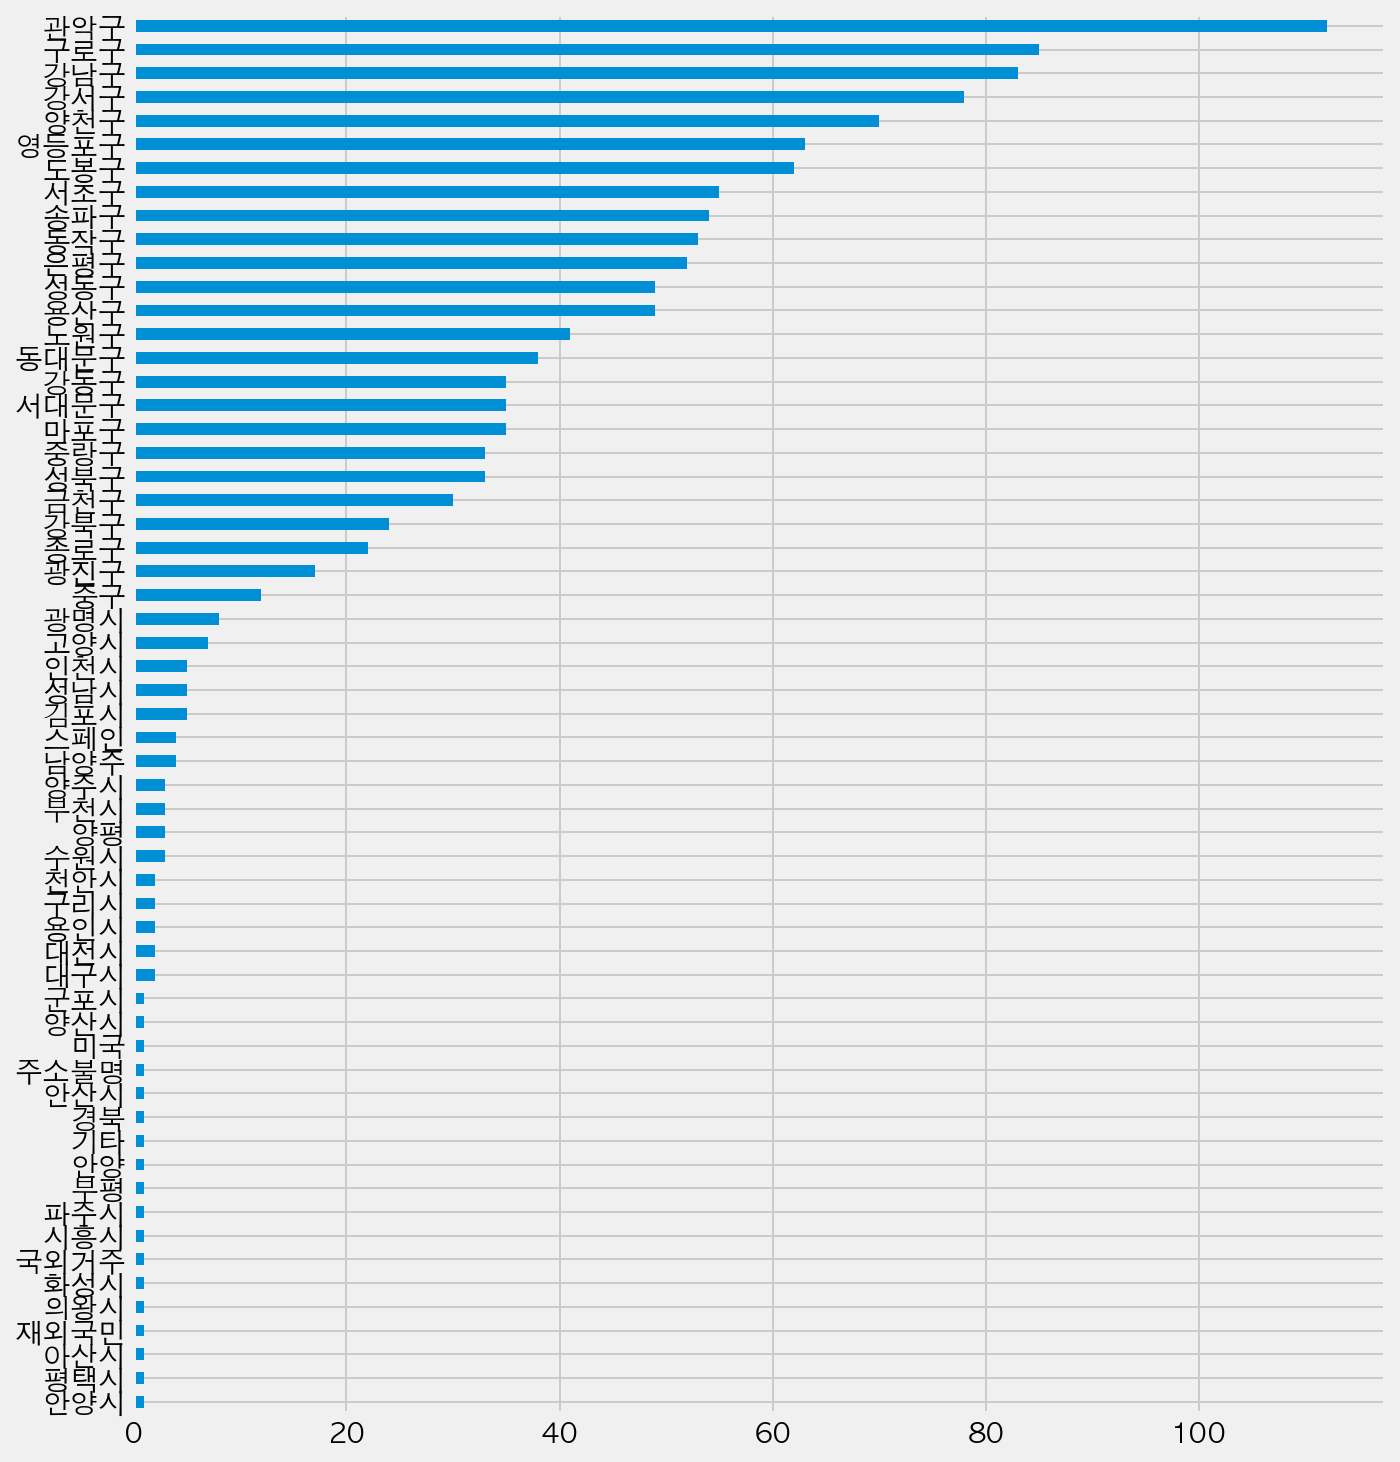

In [47]:
# 구별 확진자의 수를 시각화 합니다.
gu_count.sort_values().plot.barh(figsize=(10, 12), grid=True)

In [48]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.
gu = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
gu[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [49]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.
set(gu_count.index) - set(gu)

{'경북',
 '고양시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양평',
 '용인시',
 '의왕시',
 '인천시',
 '재외국민',
 '주소불명',
 '천안시',
 '파주시',
 '평택시',
 '화성시'}

In [50]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.
df_gu = gu_count.reset_index()
df_gu.columns = ["구", "환자수"]
df_gu.head()

,구,환자수
0,관악구,112
1,구로구,85
2,강남구,83
3,강서구,78
4,양천구,70


In [51]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
df.loc[df["거주지"].isin(gu), "지역"] = df["거주지"]
df.loc[~df["거주지"].isin(gu), "지역"] = "타지역"
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
0,1298,12696,6.27.,송파구,-,강남구 역삼동 모임,서울대학병원,2020-06-27,6,26,06-27,송파구
1,1297,12693,6.27.,영등포구,-,확인 중,서남병원,2020-06-27,6,26,06-27,영등포구
2,1296,12694,6.27.,관악구,-,확인 중,강남성심병원,2020-06-27,6,26,06-27,관악구
3,1295,12690,6.27.,관악구,-,왕성교회 관련,서남병원,2020-06-27,6,26,06-27,관악구
4,1294,12688,6.27.,관악구,-,왕성교회 관련,서남병원,2020-06-27,6,26,06-27,관악구


In [52]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"].map(lambda x : x if x in gu else "타지역")
df[["거주지", "지역"]].head()

,거주지,지역
0,송파구,송파구
1,영등포구,영등포구
2,관악구,관악구
3,관악구,관악구
4,관악구,관악구


In [53]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
df_gu_etc = df["지역"].value_counts()
df_gu_etc

관악구     112
구로구      85
강남구      83
타지역      78
강서구      78
양천구      70
영등포구     63
도봉구      62
서초구      55
송파구      54
동작구      53
은평구      52
용산구      49
성동구      49
노원구      41
동대문구     38
서대문구     35
강동구      35
마포구      35
중랑구      33
성북구      33
금천구      30
강북구      24
종로구      22
광진구      17
중구       12
Name: 지역, dtype: int64

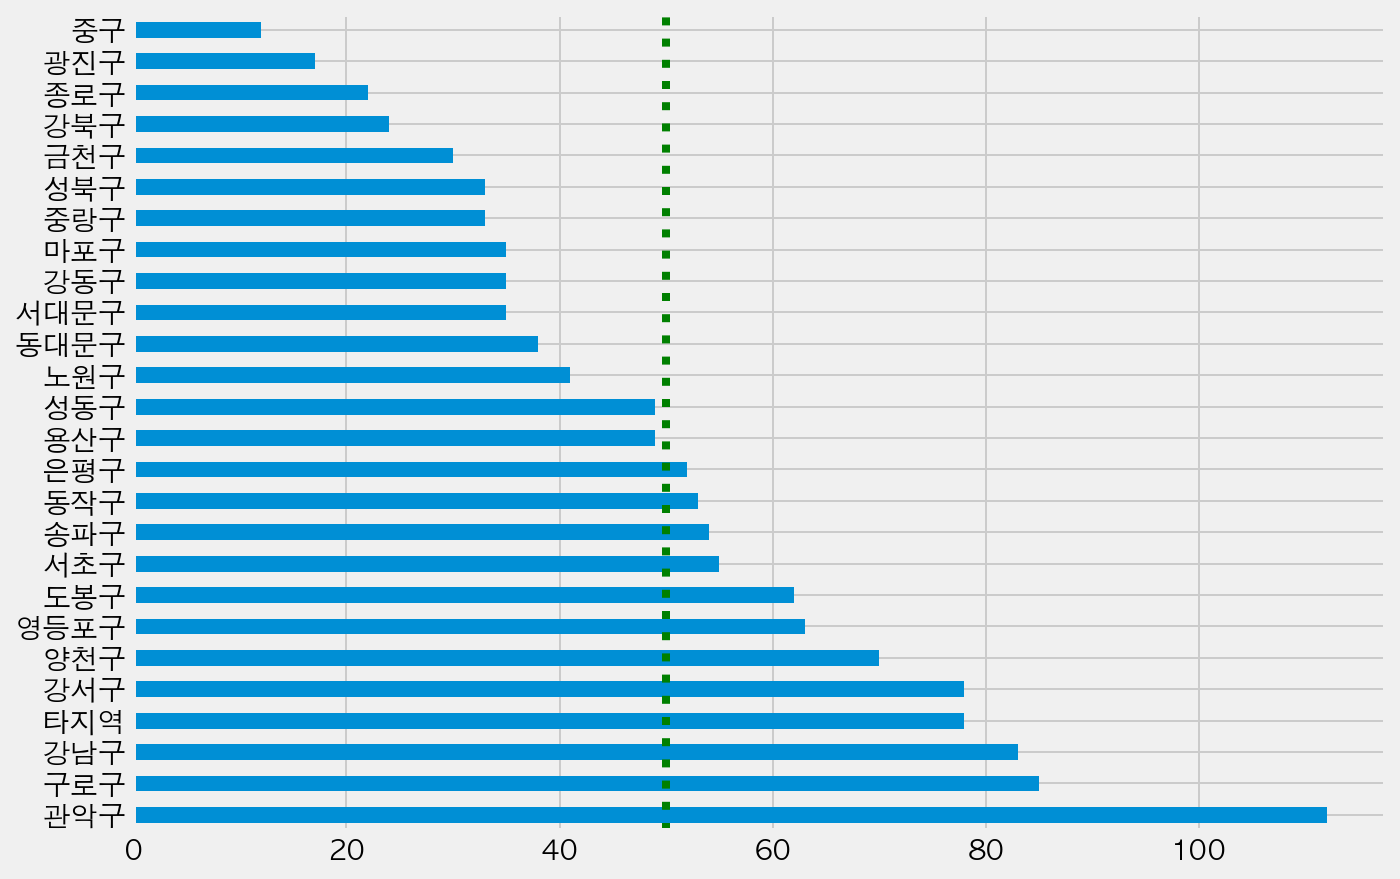

In [54]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.
g = df_gu_etc.plot.barh(figsize=(10, 7))
g.axvline(50, linestyle=":", color="green")

## 접촉력

In [55]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

해외 접촉 추정       278
이태원 클럽 관련      139
리치웨이 관련        116
확인 중            93
구로구 콜센터 관련      60
요양시설 관련         43
양천구 운동시설 관련     43
구로구 교회 관련       41
확인중             39
타시도 확진자 접촉      37
수도권 개척교회 관련     37
콜센터직원 접촉        37
동대문구 관련         28
부천시 쿠팡 관련       24
해외 접촉           22
왕성교회 관련         21
은평구 병원 관련       14
성동구 아파트 관련      13
kb 생명보험 관련      13
삼성서울병원 관련        7
Name: 접촉력, dtype: int64

In [56]:
# 접촉력의 unique 값만 구합니다.
df["접촉력"].unique()

array(['강남구 역삼동 모임', '확인 중', '왕성교회 관련', '해외 접촉 추정', '구로구 확진자 접촉',
       '리치웨이 관련', '관악구 확진자 접촉', '동작구 확진자 접촉', '금천구 확진자 접촉', '강서구 확진자 접촉',
       '타시도 확진자 접촉', '요양시설 관련', '강동구 확진자 접촉', '시청역 관련', '대자연코리아',
       '의왕 물류센터 관련', '금천구 도정기 회사 관련', '양천구 운동시설 관련', '은평구 확진자 접촉',
       '대전 다단계 관련', '오렌지라이프 관련', '수도권 개척교회 관련', '서초구 확진자 접촉',
       '타시도 확진자 접촉자', '대전 꿈꾸는 교회', '연아나뉴스클래스 관련', '한국대학생선교회 관련',
       '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련', '용인 형제 관련',
       '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련', '영등포 학원 관련',
       '강남구 동인교회 관련', '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련', '#10054 접촉',
       '#9800 접촉', '#10044 접촉', '#9641 접촉', '구로구 교회 관련', '#10407 접촉',
       '#10015 접촉', '#9364 접촉', '#10377 접촉', '#9287 접촉', '#10142 접촉',
       '#9912 접촉', '#9765 접촉', '#10115 접촉', '타시도 확진자 접촉(추정)', '#8063 접촉',
       '#10084 접촉', '#8601 접촉', '#8717 접촉', '#9946 접촉', '콜센터직원 접촉',
       '#8271 접촉', '#8669 접촉', '#9734 접촉', '#9621 접촉', '#9572 접촉', '확인중',
       '#9525 접촉', '#7914 접촉

In [57]:
# "확인" 이 들어가는 접촉력만 찾습니다.
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [58]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [59]:
# "확인" 이 들어가는 접촉력만 찾습니다.
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

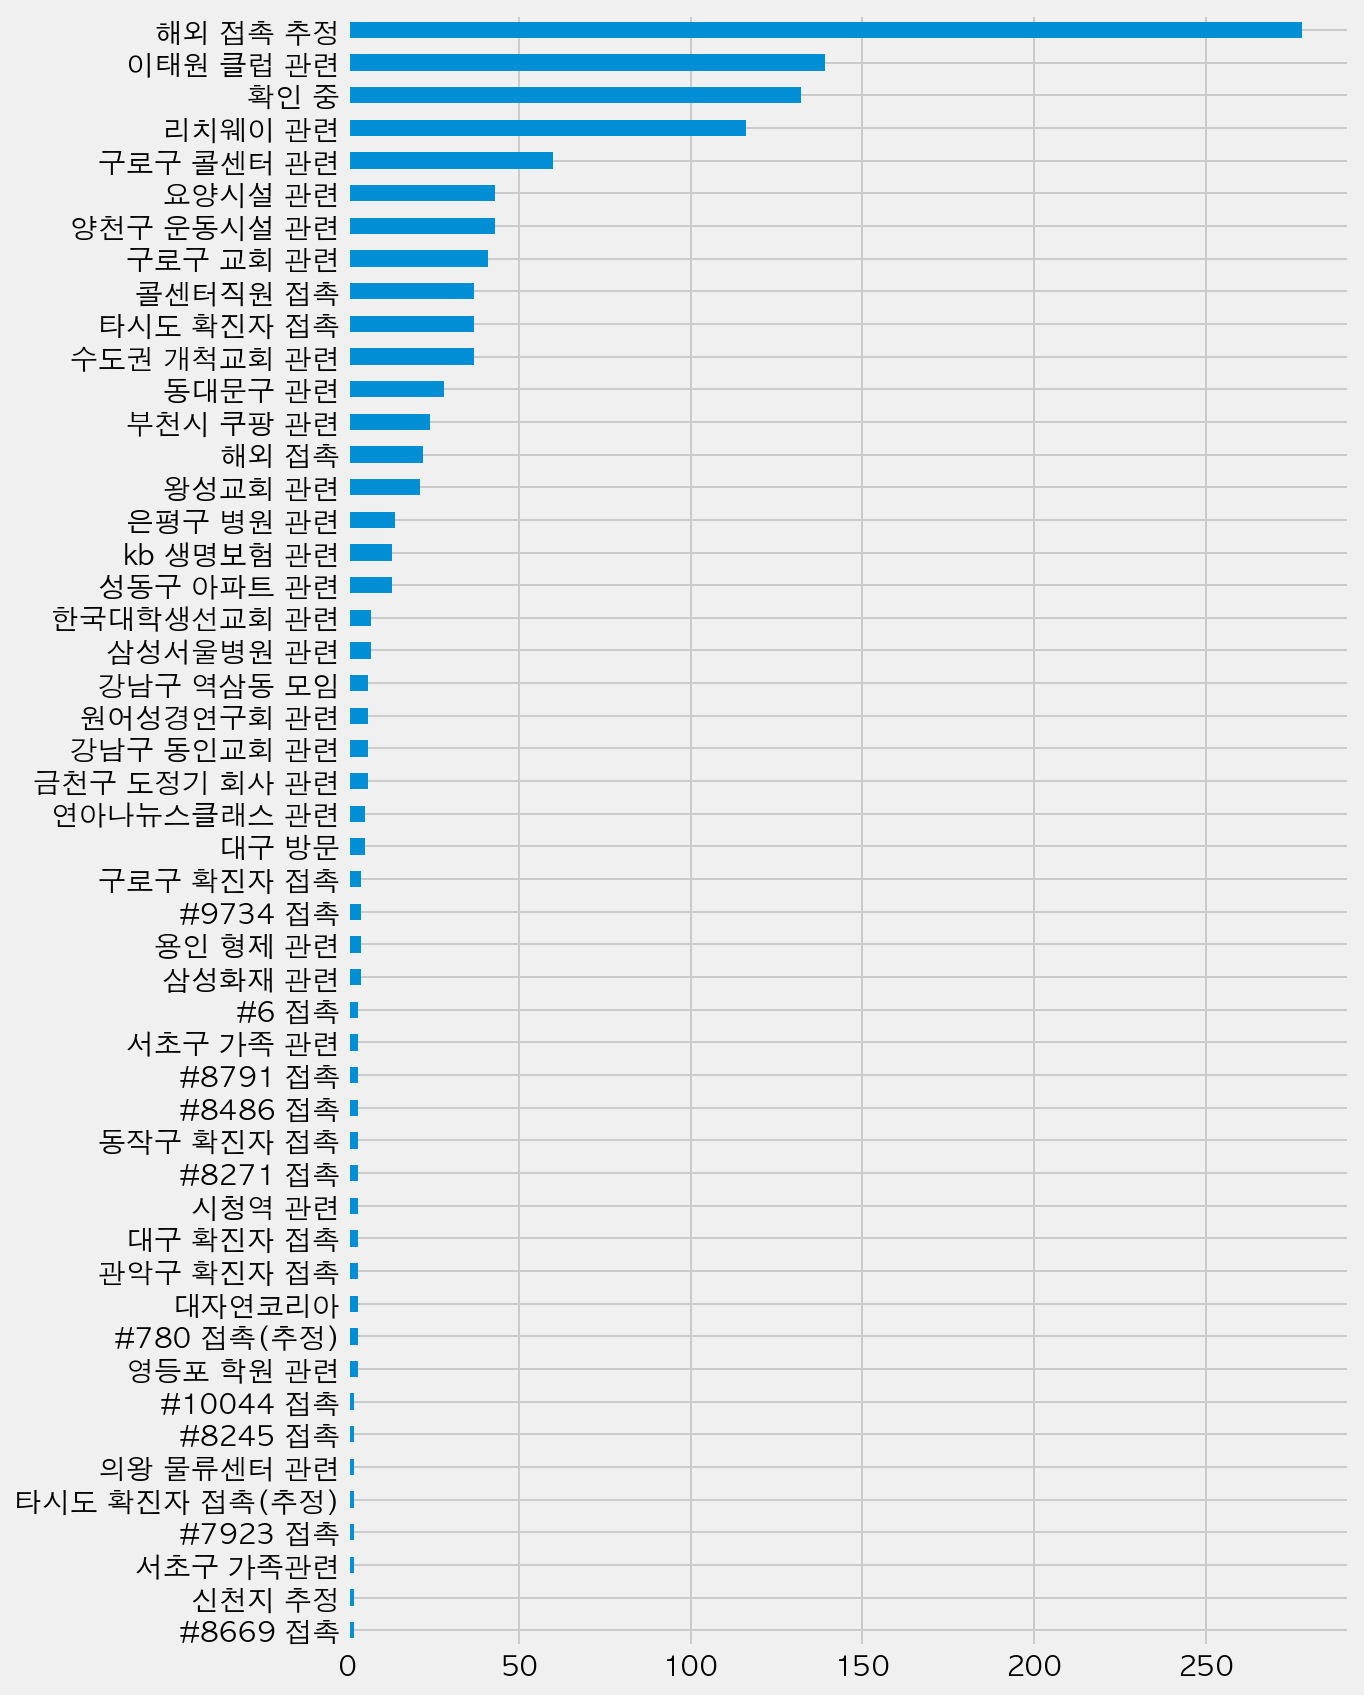

In [60]:
# 접촉력 빈도수를 시각화 합니다.
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(50)
g = contact_count_top.plot.barh(figsize=(8, 14))

In [61]:
# 상위 15개만 구합니다.
top_contact = df["접촉력"].value_counts().head(15)
top_contact

해외 접촉 추정       278
이태원 클럽 관련      139
확인 중           132
리치웨이 관련        116
구로구 콜센터 관련      60
양천구 운동시설 관련     43
요양시설 관련         43
구로구 교회 관련       41
콜센터직원 접촉        37
타시도 확진자 접촉      37
수도권 개척교회 관련     37
동대문구 관련         28
부천시 쿠팡 관련       24
해외 접촉           22
왕성교회 관련         21
Name: 접촉력, dtype: int64

In [62]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.
top_contact.index

Index(['해외 접촉 추정', '이태원 클럽 관련', '확인 중', '리치웨이 관련', '구로구 콜센터 관련', '양천구 운동시설 관련',
       '요양시설 관련', '구로구 교회 관련', '콜센터직원 접촉', '타시도 확진자 접촉', '수도권 개척교회 관련',
       '동대문구 관련', '부천시 쿠팡 관련', '해외 접촉', '왕성교회 관련'],
      dtype='object')

In [63]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1297,12693,6.27.,영등포구,-,확인 중,서남병원,2020-06-27,6,26,06-27,영등포구
2,1296,12694,6.27.,관악구,-,확인 중,강남성심병원,2020-06-27,6,26,06-27,관악구
3,1295,12690,6.27.,관악구,-,왕성교회 관련,서남병원,2020-06-27,6,26,06-27,관악구
4,1294,12688,6.27.,관악구,-,왕성교회 관련,서남병원,2020-06-27,6,26,06-27,관악구
5,1293,12684,6.27.,양천구,키르기스스탄,해외 접촉 추정,생활치료센터,2020-06-27,6,26,06-27,양천구


In [64]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count().unstack()

월,1,2,3,4,5,6
접촉력,,,,,,
구로구 교회 관련,NaN,NaN,35.0,6.0,NaN,NaN
구로구 콜센터 관련,NaN,NaN,60.0,NaN,NaN,NaN
동대문구 관련,NaN,NaN,28.0,NaN,NaN,NaN
리치웨이 관련,NaN,NaN,NaN,NaN,NaN,116.0
부천시 쿠팡 관련,NaN,NaN,NaN,NaN,19.0,5.0
수도권 개척교회 관련,NaN,NaN,NaN,NaN,NaN,37.0
양천구 운동시설 관련,NaN,NaN,NaN,NaN,NaN,43.0
왕성교회 관련,NaN,NaN,NaN,NaN,NaN,21.0
요양시설 관련,NaN,NaN,NaN,NaN,NaN,43.0


### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

In [65]:
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
318,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,06-06,성동구
333,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06,은평구
342,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원,2020-06-06,6,23,06-06,성동구
349,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원,2020-06-05,6,23,06-05,은평구
364,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05,성동구
422,876,11535,6.01.,강동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-01,6,23,06-01,강동구


### 감염경로 불명

In [66]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.
df_unknown = df[df["접촉력"] == "확인 중"]
df_unknown

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1297,12693,6.27.,영등포구,-,확인 중,서남병원,2020-06-27,6,26,06-27,영등포구
2,1296,12694,6.27.,관악구,-,확인 중,강남성심병원,2020-06-27,6,26,06-27,관악구
12,1286,12686,6.27.,용산구,-,확인 중,서북병원,2020-06-27,6,26,06-27,용산구
35,1263,12592,6.25.,관악구,-,확인 중,생활치료센터,2020-06-25,6,26,06-25,관악구
49,1249,12557,6.24.,양산시,-,확인 중,서울의료원,2020-06-24,6,26,06-24,타지역
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,56,1611,2.25.,고양시,-,확인 중,보라매병원(퇴원),2020-02-25,2,9,02-25,타지역
1256,42,996,2.25.,노원구,-,확인 중,보라매병원(퇴원),2020-02-25,2,9,02-25,노원구
1259,39,907,2.25.,평택시,-,확인 중,타시도 이관(퇴원),2020-02-25,2,9,02-25,타지역
1260,38,935,2.25.,관악구,-,확인 중,삼육서울병원(퇴원),2020-02-25,2,9,02-25,관악구


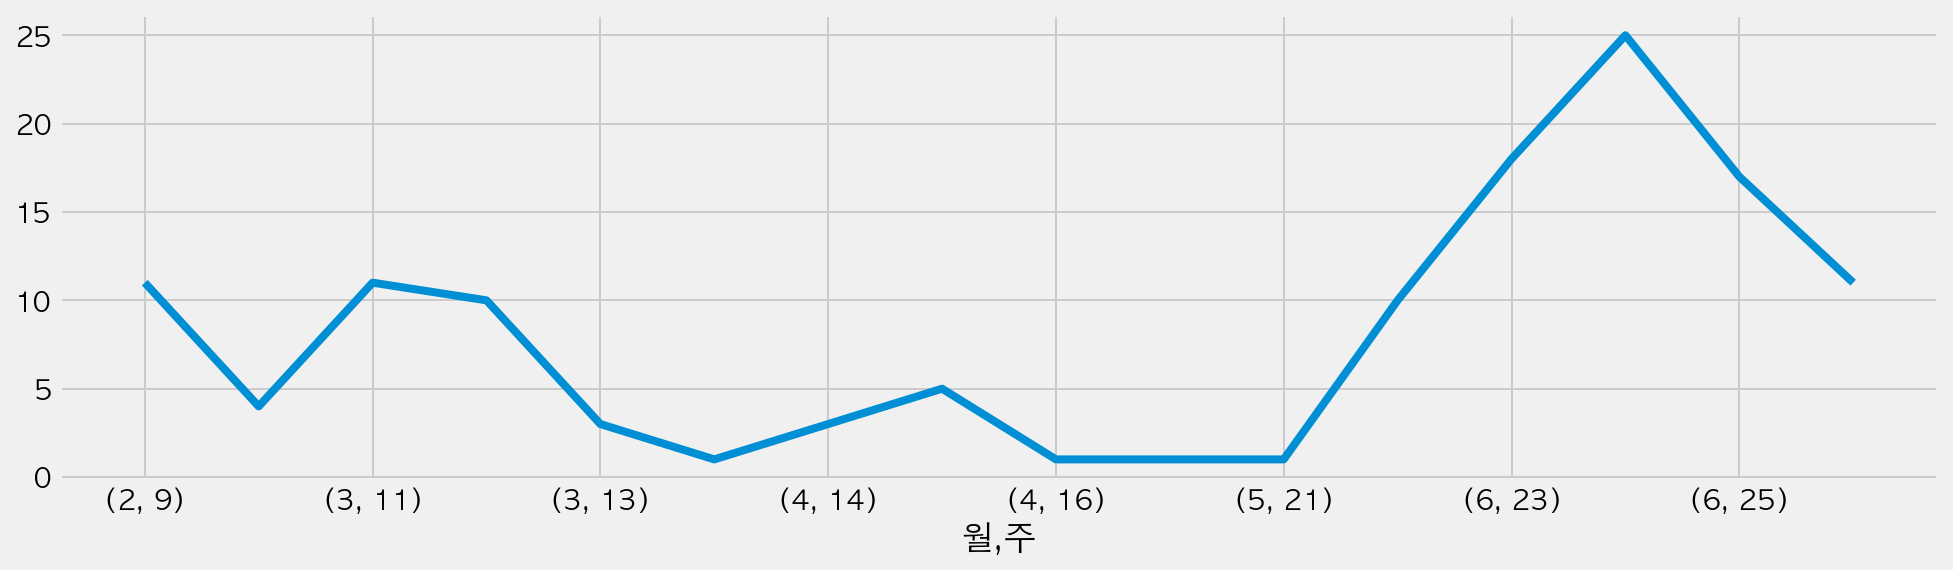

In [67]:
# 감염경로 불명이 어느정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot(figsize=(15, 4))

In [68]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
23,134
14,128
24,125
11,124
25,106


In [69]:
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
24,25
23,18
25,17
26,11
11,11


In [70]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.
unknown_case = all_weekly_case.merge(unknown_weekly_case, 
                                     left_index=True, right_index=True).sort_index()
unknown_case

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,10
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


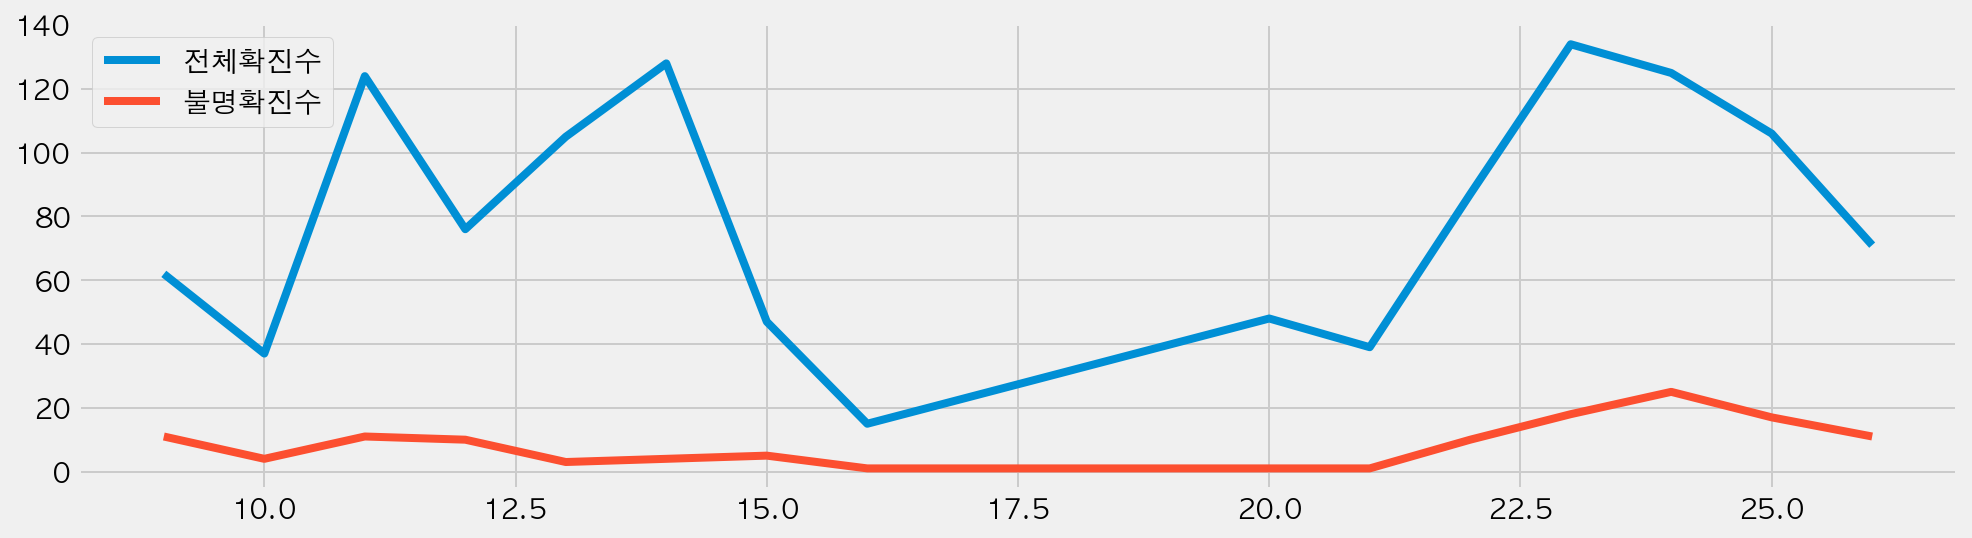

In [71]:
unknown_case.plot(figsize=(15, 4))

In [72]:
# 감염경로 "확인 중"의 주별 비율
(unknown_case["불명확진수"] / unknown_case["전체확진수"]) * 100

9     17.741935
10    10.810811
11     8.870968
12    13.157895
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    16.037736
26    15.492958
dtype: float64

## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [73]:
import re

# 숫자외의 데이터는 제거하는 정규표현식
re.sub("[^0-9]", "", "#7265 접촉(추정)")

'7265'

In [74]:
# 함수를 통해 숫자외의 문자를 제거하는 함수를 만듭니다.
def get_number(text):
    return re.sub("[^0-9]", "", text)
    
get_number("#7265 접촉(추정)")

'7265'

In [75]:
# 함수를 map을 통해 접촉번호를 구합니다.
df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact

,index,접촉번호
0,,1213
1,6,4
2,9734,4
3,8271,3
4,8486,3
...,...,...
57,3,1
58,29,1
59,10084,1
60,1247,1


In [76]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.
contact = contact.drop(0)
contact  = contact.head(10)
contact

,index,접촉번호
1,6,4
2,9734,4
3,8271,3
4,8486,3
5,780,3
6,8791,3
7,794,2
8,6832,2
9,10044,2
10,9287,2


In [77]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.
top_contact_no = contact["index"]
top_contact_no

1         6
2      9734
3      8271
4      8486
5       780
6      8791
7       794
8      6832
9     10044
10     9287
Name: index, dtype: object

In [78]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.
df[df["접촉번호"].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호
685,613,10588,4.13.,성북구,-,#10044 접촉,적십자병원(퇴원),2020-04-13,4,16,04-13,성북구,10044
738,560,10265,4.05.,송파구,-,#9287 접촉,서울의료원(퇴원),2020-04-05,4,14,04-05,송파구,9287
765,533,10222,4.3.,동작구,-,#10044 접촉,보라매병원(퇴원),2020-04-03,4,14,04-03,동작구,10044
785,513,10115,4.3.,강남구,-,#9287 접촉,서울성모병원(퇴원),2020-04-03,4,14,04-03,강남구,9287
807,491,10021,4.01.,영등포구,-,#8271 접촉,서울의료원(퇴원),2020-04-01,4,14,04-01,영등포구,8271
825,473,9870,3.31.,수원시,-,#9734 접촉,타시도 이관(사망),2020-03-31,3,14,03-31,타지역,9734
826,472,9800,3.31.,중구,-,#9734 접촉,보라매병원(퇴원),2020-03-31,3,14,03-31,중구,9734
851,447,9725,3.30.,중구,-,#9734 접촉,보라매병원(퇴원),2020-03-30,3,14,03-30,중구,9734
856,442,9706,3.30.,서초구,-,#9734 접촉,서울의료원(퇴원),2020-03-30,3,14,03-30,서초구,9734
917,381,9427,3.27.,중랑구,-,#8791 접촉,서울의료원(퇴원),2020-03-27,3,13,03-27,중랑구,8791


## 조치사항

In [79]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는데 사용합니다.
df["조치사항"].value_counts()

서울의료원(퇴원)       316
보라매병원(퇴원)       170
서남병원(퇴원)        148
서남병원             90
생활치료센터(퇴원)       76
               ... 
고대안암병원(퇴원)        1
서울대학교병원(사망)       1
중앙대학병원(퇴원)        1
서울대학병원            1
국군수도통합병원(퇴원)      1
Name: 조치사항, Length: 74, dtype: int64

## 퇴원, 사망여부

In [80]:
df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["사망"] = df["조치사항"].str.contains("사망")
df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "")
df["병원"] = df["병원"].str.replace("\(사망\)", "")

In [81]:
df["퇴원"].value_counts()

True     924
False    374
Name: 퇴원, dtype: int64

In [82]:
df["퇴원"].value_counts(normalize=True) * 100

True     71.186441
False    28.813559
Name: 퇴원, dtype: float64

In [83]:
df["사망"].value_counts()

False    1291
True        7
Name: 사망, dtype: int64

In [84]:
df["사망"].value_counts(normalize=True) * 100

False    99.460709
True      0.539291
Name: 사망, dtype: float64

* 데이터 수집 시점에서 부터 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [85]:
df[(df["퇴원"] == False) & (df["사망"] == False) & (df["지역"] != "타지역")].tail(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
627,671,10882,5.10.,용산구,-,이태원 클럽 관련,국립중앙의료원,2020-05-10,5,19,05-10,용산구,,False,False,국립중앙의료원


## 병원

In [86]:
hospital_count = df["병원"].value_counts()
hospital_count

서울의료원            390
서남병원             239
보라매병원            236
생활치료센터            88
서북병원              63
국립중앙의료원           61
타시도 이관            46
은평성모병원            15
서울대학교병원           14
상계백병원             12
중앙대학교병원           11
적십자병원             11
서울대병원             10
고대구로병원             8
삼육서울병원             7
중앙대병원              6
순천향병원              6
강북삼성병원             6
서울아산병원             6
한일병원               6
순천향서울병원            6
서울성모병원             5
원자력병원              5
세브란스병원             4
강남성심병원             4
서울백병원              3
건국대병원              3
서울삼성병원             3
한양대병원              3
순천향대학병원            2
생활치료시설             2
삼성서울병원             2
국군수도통합병원           2
한양대학교병원            2
강남세브란스병원           2
한양대병원/국립중앙의료원      1
국군수도병원             1
중앙대학병원             1
경희대학교병원            1
고대안암병원             1
건대병원               1
서울대학병원             1
-                  1
신촌세브란스병원           1
Name: 병원, dtype: int64

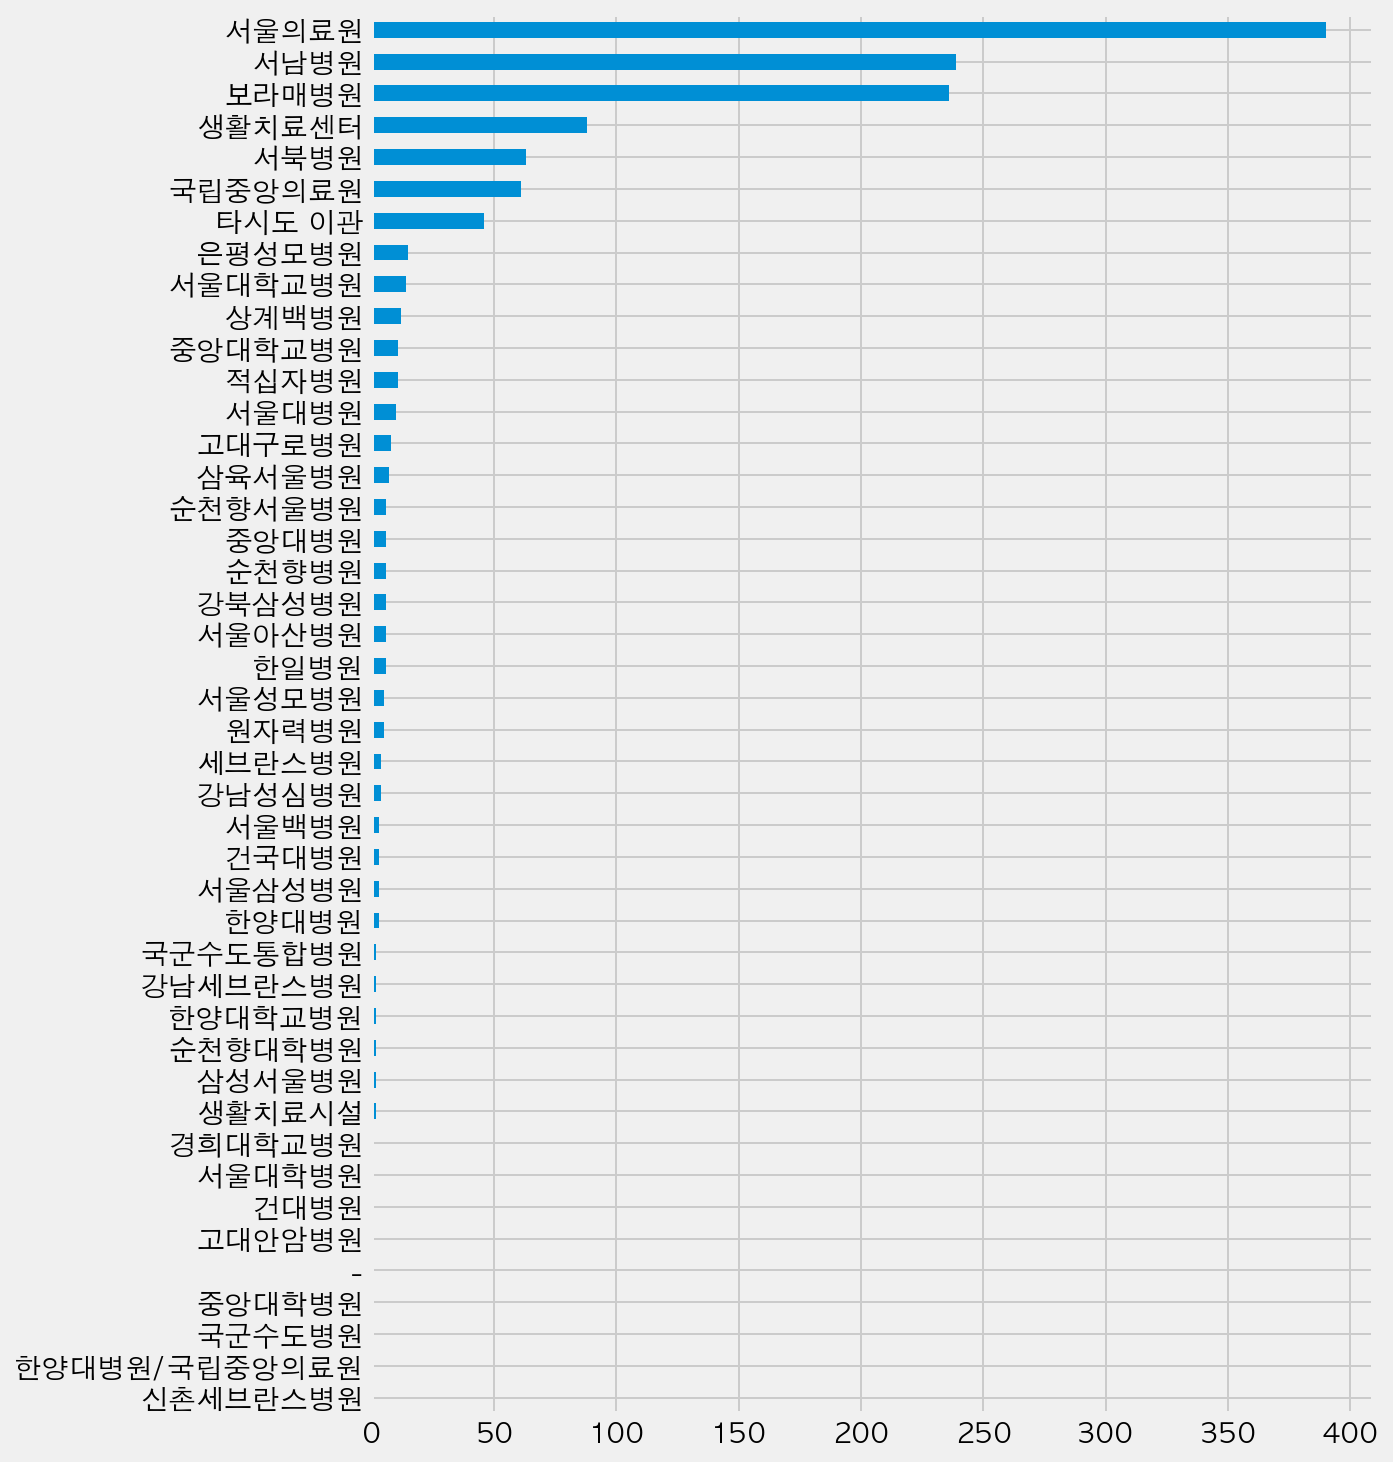

In [87]:
# 병원별 빈도수를 막대그래프로 표현합니다.
hospital_count.sort_values().plot.barh(figsize=(8, 12))

In [88]:
# 입원환자가 많은 병원을 구합니다.
top_count_hospital = hospital_count.head(10)
top_count_hospital = top_count_hospital.index
top_count_hospital

Index(['서울의료원', '서남병원', '보라매병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '상계백병원'],
      dtype='object')

### iloc 로 일부 데이터만 보기

In [89]:
# 전체 데이터를 보기에 너무 많을 수 있기 때문에 iloc 를 사용해서 일부 데이터만 봅니다.
hospital_gu = df.groupby(["지역", "병원"])["연번"].count().unstack()
hospital_gu.iloc[:8, :8]

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원
지역,,,,,,,,
강남구,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
강동구,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강서구,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN
관악구,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0
광진구,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
구로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
금천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### loc로 일부 데이터만 보기
* iloc 와 loc의 차이점을 비교해 보세요.

In [90]:
hospital_gu.loc["강남구"].head()

병원
-           NaN
강남성심병원      NaN
강남세브란스병원    1.0
강북삼성병원      NaN
건국대병원       NaN
Name: 강남구, dtype: float64

In [91]:
hospital_gu.loc["강남구", "서울의료원"]

26.0

In [92]:
hospital_gu.loc[["강남구", "강동구", "강북구"], top_count_hospital]

,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,상계백병원
지역,,,,,,,,,,
강남구,26.0,7.0,21.0,6.0,2.0,4.0,NaN,NaN,NaN,1.0
강동구,23.0,2.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN
강북구,11.0,5.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0


### pandas style 적용하기

In [93]:
hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)
hospital_gu_heatmap.style.background_gradient()

In [94]:
hospital_gu_heatmap[top_count_hospital].style.background_gradient(cmap="Blues")

병원,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,상계백병원
지역,,,,,,,,,,
강남구,26,7,21,6,2,4,0,0,0,1
강동구,23,2,0,0,1,4,0,0,0,0
강북구,11,5,2,1,0,1,0,0,0,1
강서구,9,26,14,4,7,2,0,4,1,0
관악구,21,24,37,9,3,3,0,1,0,0
광진구,9,1,2,0,1,1,0,0,1,0
구로구,16,22,25,1,3,12,0,0,0,0
금천구,1,13,13,0,0,1,0,1,0,0
노원구,29,1,3,0,2,1,0,0,0,5


## 여행력

In [95]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"] = df["해외"].replace("", np.nan)
df["해외"].unique()

array([nan, '키르기스스탄', '이라크', '아랍에미리트', '인도', '미국', '멕시코', '카자흐스탄', 'UAE',
       '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드', '스페인',
       '프랑스', '콩코, 프랑스', '캐나다', '독일', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아',
       '포르투칼', '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '멕시코, 미국', '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

In [96]:
df["해외"].value_counts()

미국                           123
영국                            45
필리핀                           18
스페인                           11
프랑스                           10
태국                             6
캐나다                            5
멕시코                            5
중국 우한시                         4
브라질                            4
일본                             4
파키스탄                           4
인도                             3
UAE                            3
이탈리아                           3
아일랜드                           2
키르기스스탄                         2
터키                             2
프랑스, 독일                        2
아랍에미리트                         2
팔라우                            2
필리핀, 마닐라                       2
독일                             2
이탈리아, 프랑스                      2
카자흐스탄                          2
인도네시아                          2
폴란드                            2
이라크                            2
아르헨티나, 볼리비아, 브라질               1
우한 교민                          1
싱가포르      

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [97]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(304, 17)

In [98]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea["해외"].unique()

array(['키르기스스탄', '이라크', '아랍에미리트', '인도', '미국', '멕시코', '카자흐스탄', 'UAE', '영국',
       '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드', '스페인', '프랑스',
       '콩코, 프랑스', '캐나다', '독일', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드',
       '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코',
       '미국 뉴욕', '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질',
       '폴란드', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일',
       '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [99]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드|터키|아일랜드'

In [100]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [101]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea["해외"].unique()

array(['키르기스스탄', '이라크', 'UAE', '인도', '미국', '남미', '카자흐스탄', '유럽', '필리핀',
       '방글라데시', '일본', '파키스탄', '러시아', '캐나다', '팔라우', '호주, 인도네시아', '인도네시아',
       '포르투칼', '태국', '말레이시아', '중국', '베트남', '싱가포르'], dtype=object)

In [102]:
df_oversea["해외"].value_counts()

미국           125
유럽            93
필리핀           20
남미            15
중국             7
태국             6
UAE            5
캐나다            5
일본             4
파키스탄           4
인도             3
인도네시아          2
키르기스스탄         2
이라크            2
카자흐스탄          2
팔라우            2
방글라데시          1
러시아            1
포르투칼           1
베트남            1
싱가포르           1
말레이시아          1
호주, 인도네시아      1
Name: 해외, dtype: int64

In [103]:
# 확진일자, 해외 별 카운트 수를 구합니다.
day_oversea = df_oversea.groupby(
    ["확진일자", "해외"])["연번"].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

In [104]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.
day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      3
2020-02-02  중국      4
2020-02-05  싱가포르    1
2020-02-06  중국      5
Name: 연번, dtype: int64

In [105]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.
day_oversea = day_oversea.reset_index()
day_oversea = day_oversea.rename(columns={'연번':'확진자수'})
print(day_oversea.shape)
day_oversea.head(10)

(161, 3)


,확진일자,해외,확진자수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5
5,2020-02-07,중국,6
6,2020-02-23,베트남,1
7,2020-02-25,중국,7
8,2020-02-25,태국,1
9,2020-02-27,유럽,1


In [106]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts(ascending=True)
oversea_count

호주, 인도네시아      1
말레이시아          1
싱가포르           1
베트남            1
포르투칼           1
러시아            1
방글라데시          1
팔라우            2
카자흐스탄          2
이라크            2
키르기스스탄         2
인도네시아          2
인도             3
파키스탄           4
일본             4
캐나다            5
UAE            5
태국             6
중국             7
남미            15
필리핀           20
유럽            93
미국           125
Name: 해외, dtype: int64

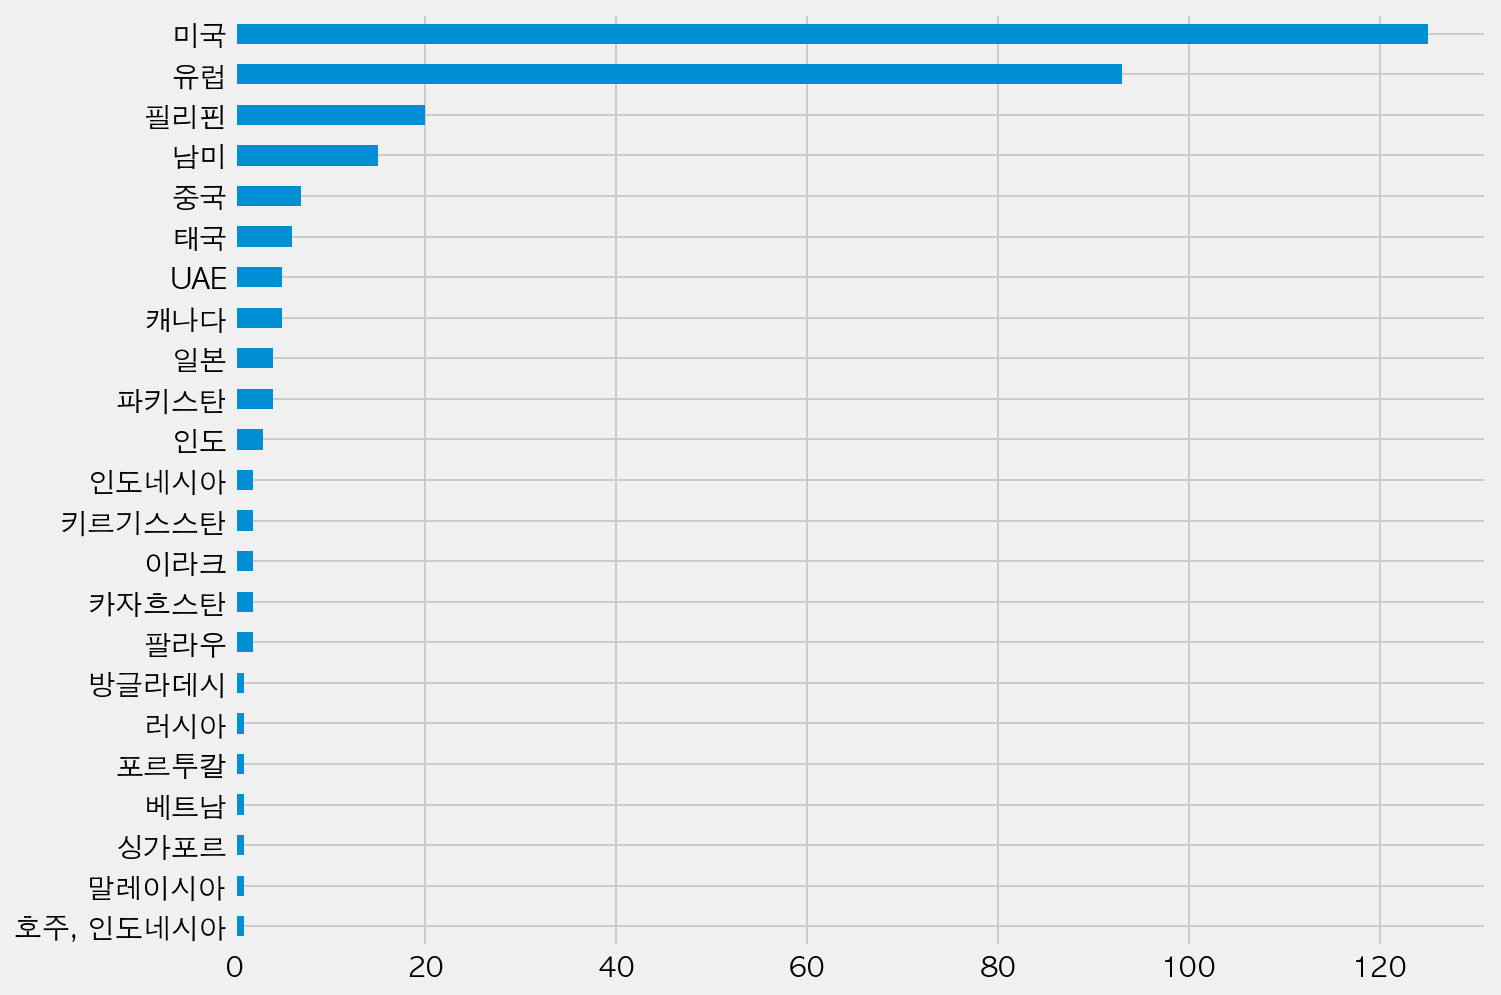

In [107]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.plot.barh(figsize=(10, 8))

In [108]:
day_oversea.iloc[-1, 0]

Timestamp('2020-06-27 00:00:00')

In [109]:
oversea_count.index[-1]

'미국'

In [110]:
day_oversea.head()

,확진일자,해외,확진자수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [111]:
day_oversea_count = day_oversea.set_index("확진일자")
day_oversea_count.head()

,해외,확진자수
확진일자,,
2020-01-24,중국,1
2020-01-30,중국,3
2020-02-02,중국,4
2020-02-05,싱가포르,1
2020-02-06,중국,5


In [112]:
df_oversea["구"] = df_oversea["거주지"]
df_oversea.loc[~df_oversea["거주지"].str.endswith("구"), "구"] = "타지역"

In [113]:
oversea_count_gu = df_oversea["구"].value_counts()
oversea_count_gu

강남구     41
서초구     27
송파구     24
타지역     22
용산구     17
마포구     15
성동구     14
서대문구    13
관악구     12
동작구     12
강동구     12
성북구     10
노원구      9
강서구      9
영등포구     9
중랑구      8
은평구      8
도봉구      8
동대문구     7
광진구      7
종로구      6
양천구      5
구로구      3
중구       3
강북구      2
금천구      1
Name: 구, dtype: int64

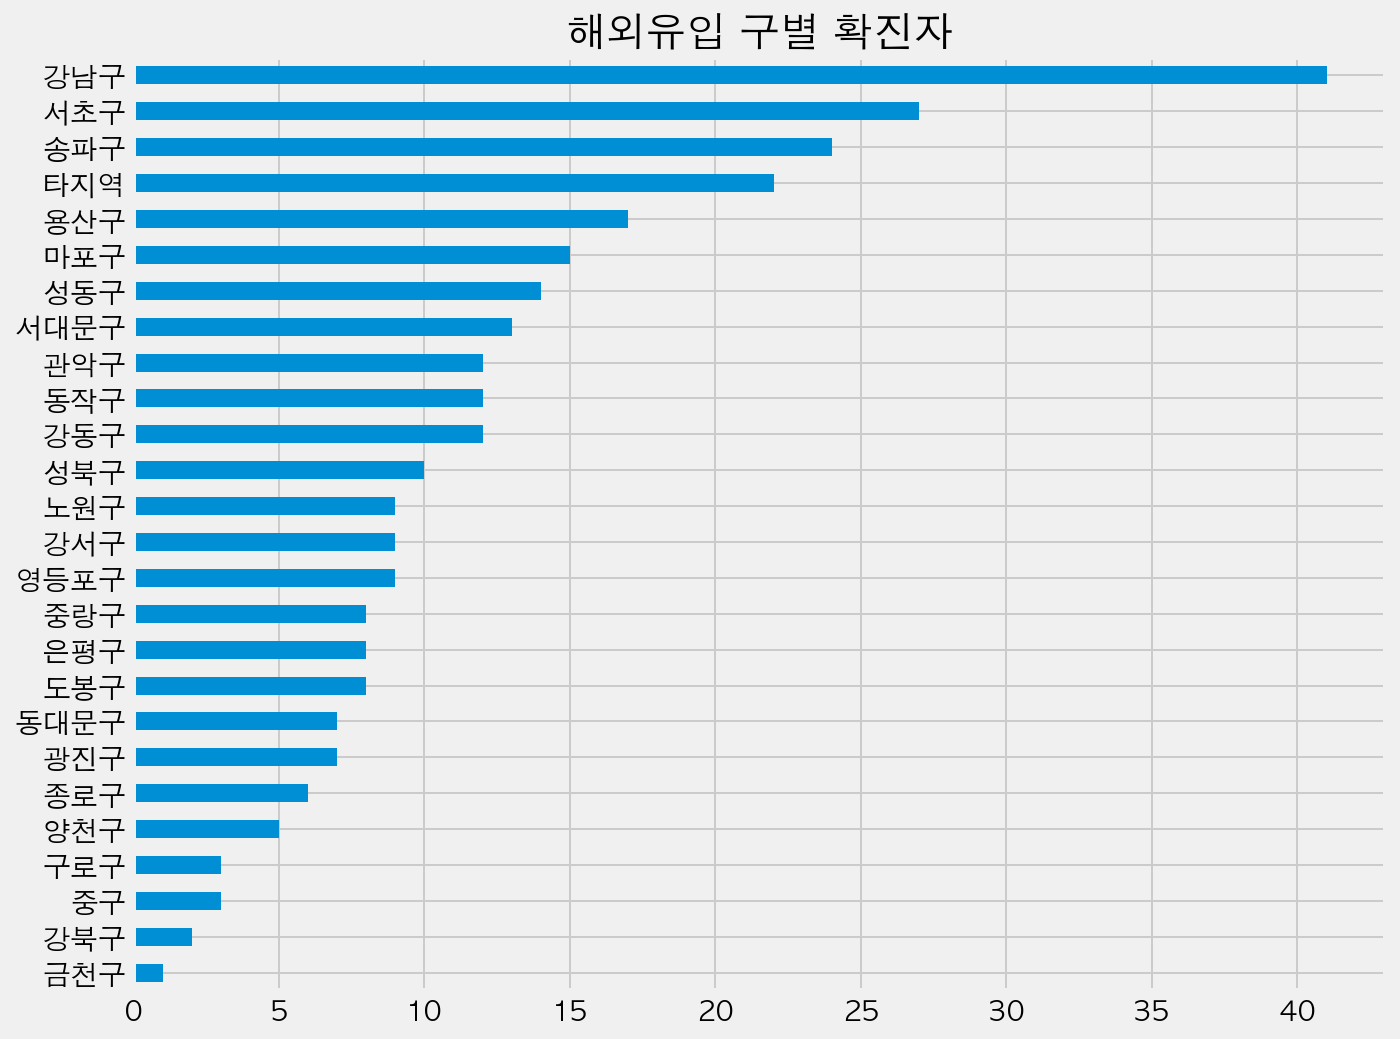

In [114]:
plt.figure(figsize=(10, 8))
plt.title("해외유입 구별 확진자")
oversea_count_gu.sort_values().plot.barh()

### 전체확진수와 해외유입 확진수 비교

In [115]:
all_count_gu = df["지역"].value_counts()
all_count_gu.head()

관악구    112
구로구     85
강남구     83
타지역     78
강서구     78
Name: 지역, dtype: int64

In [116]:
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu.head()

,전체확진수
관악구,112
구로구,85
강남구,83
타지역,78
강서구,78


In [117]:
df_oversea_gu = oversea_count_gu.to_frame()
df_oversea_gu.columns = ["해외유입확진수"]
df_oversea_gu.head()

,해외유입확진수
강남구,41
서초구,27
송파구,24
타지역,22
용산구,17


In [118]:
df_all_oversea_case  = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,112,12
구로구,85,3
강남구,83,41
타지역,78,22
강서구,78,9


### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

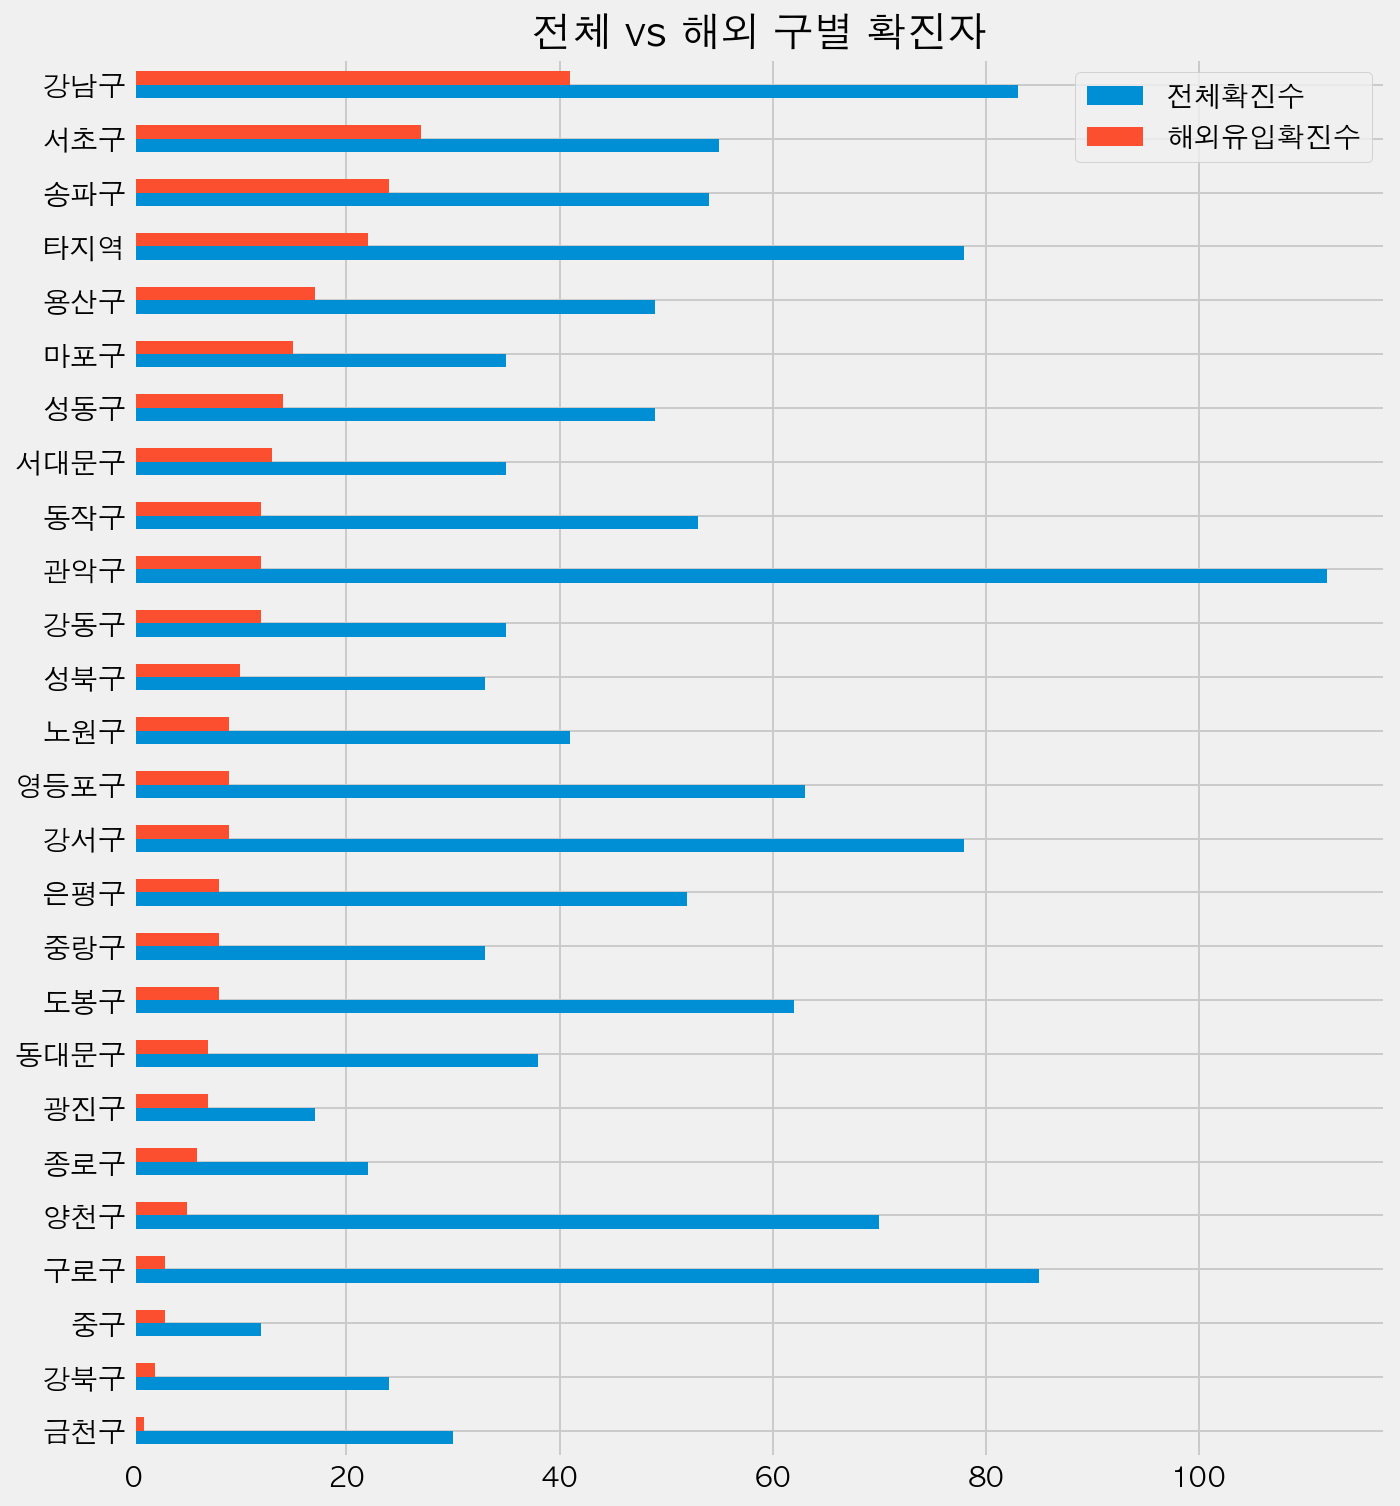

In [119]:
df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(
    title ="전체 vs 해외 구별 확진자", 
    figsize=(10, 12))

In [120]:
df_all_oversea_case["해외유입비율"] = df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"] * 100
df_all_oversea_case["해외유입비율"].sort_values(ascending=False).head(10)

강남구     49.397590
서초구     49.090909
송파구     44.444444
마포구     42.857143
광진구     41.176471
서대문구    37.142857
용산구     34.693878
강동구     34.285714
성북구     30.303030
성동구     28.571429
Name: 해외유입비율, dtype: float64

### 해외유입 확진자 중 퇴원 여부

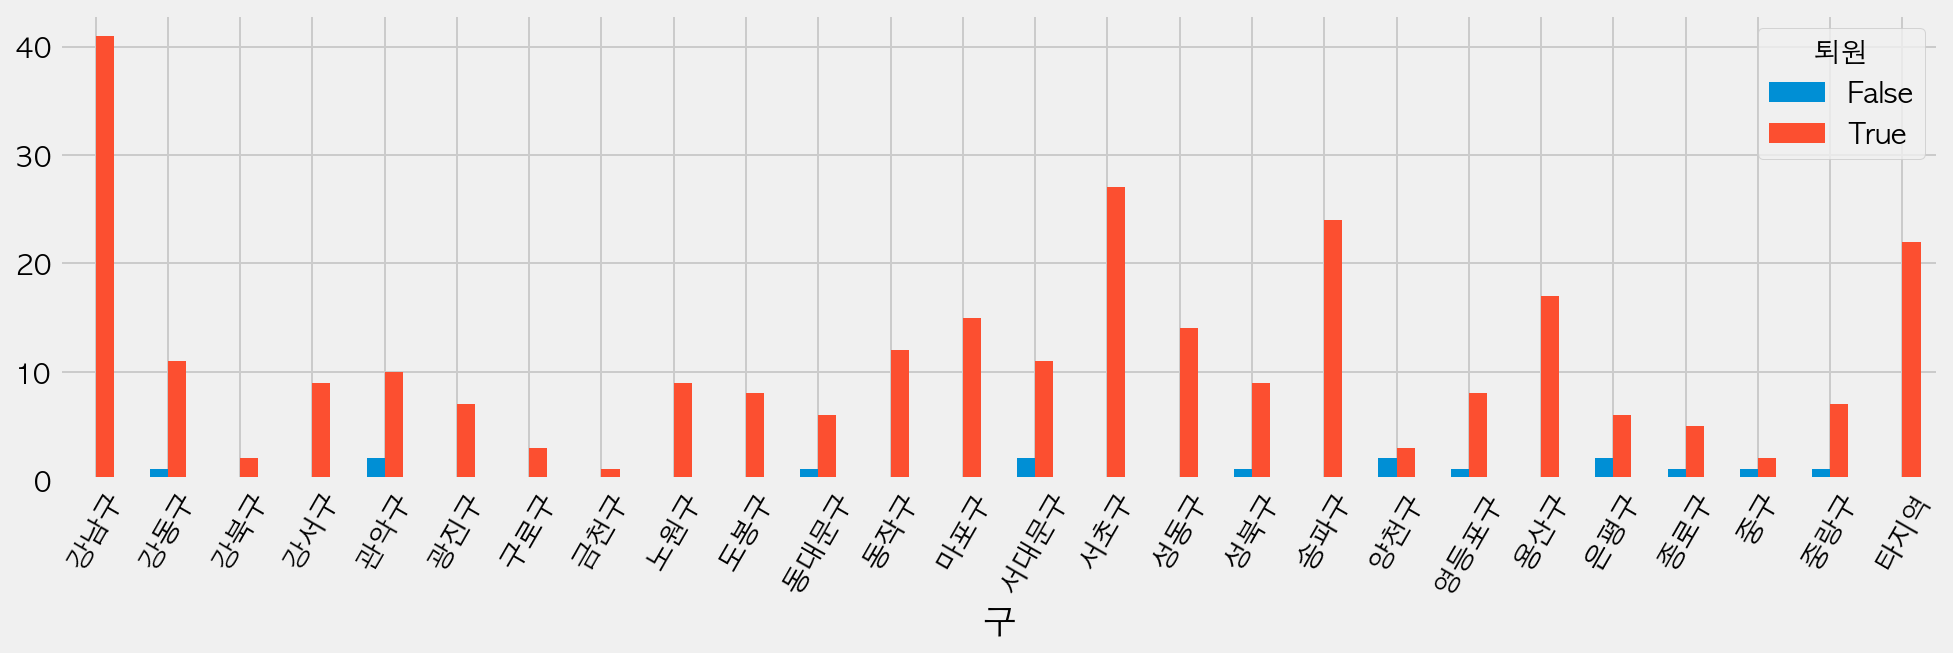

In [121]:
oversea_finish_count = df_oversea.groupby(
    ["구", "퇴원"])["환자"].count().unstack().fillna(0)
oversea_finish_count.plot.bar(figsize=(15, 4), rot=60)

### 월별 해외 확진자 수

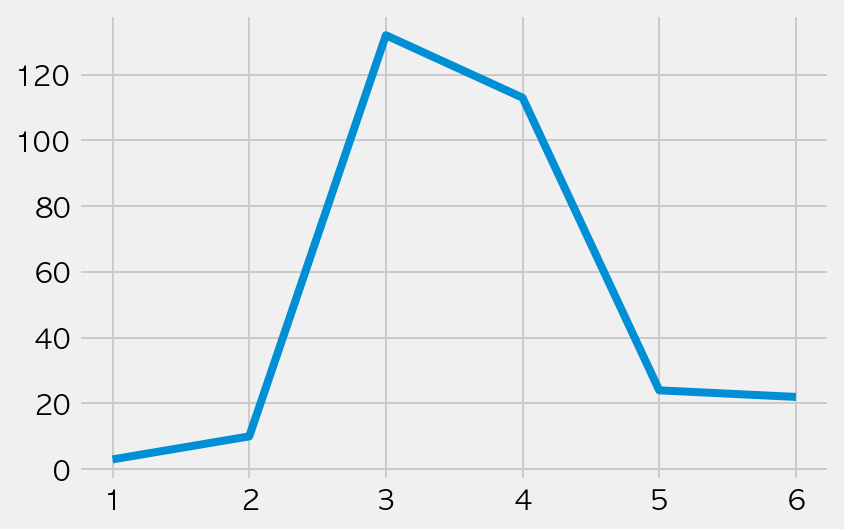

In [122]:
oversea_monthly_count = df_oversea["월"].value_counts()
oversea_monthly_count.sort_index().plot()

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

In [123]:
month_gu = df_oversea.groupby(["월", "구"])["환자"].count().unstack()
month_gu.fillna(0).astype(int).style.background_gradient()

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,1,0,1,0,0,2,1,1,1,1,3,1,0,2,1,1,1,1


#### crosstab 으로 빈도수 구하기

In [124]:
month_gu = pd.crosstab(index=df_oversea["월"], columns=df_oversea["구"])
month_gu.style.background_gradient()

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,1,0,1,0,0,2,1,1,1,1,3,1,0,2,1,1,1,1


#### pivot_table 로 빈도수 구하기

In [125]:
month_gu = pd.pivot_table(df_oversea, 
               index="월", 
               columns="구", 
               values="환자", aggfunc="count", fill_value=0)
month_gu.style.background_gradient()

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,1,0,1,0,0,2,1,1,1,1,3,1,0,2,1,1,1,1


### 해외유입이 많은 지역

In [126]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
top_oversea_gu = oversea_count_gu.T.head(10).index
top_oversea_gu

Index(['강남구', '서초구', '송파구', '타지역', '용산구', '마포구', '성동구', '서대문구', '관악구', '동작구'], dtype='object')

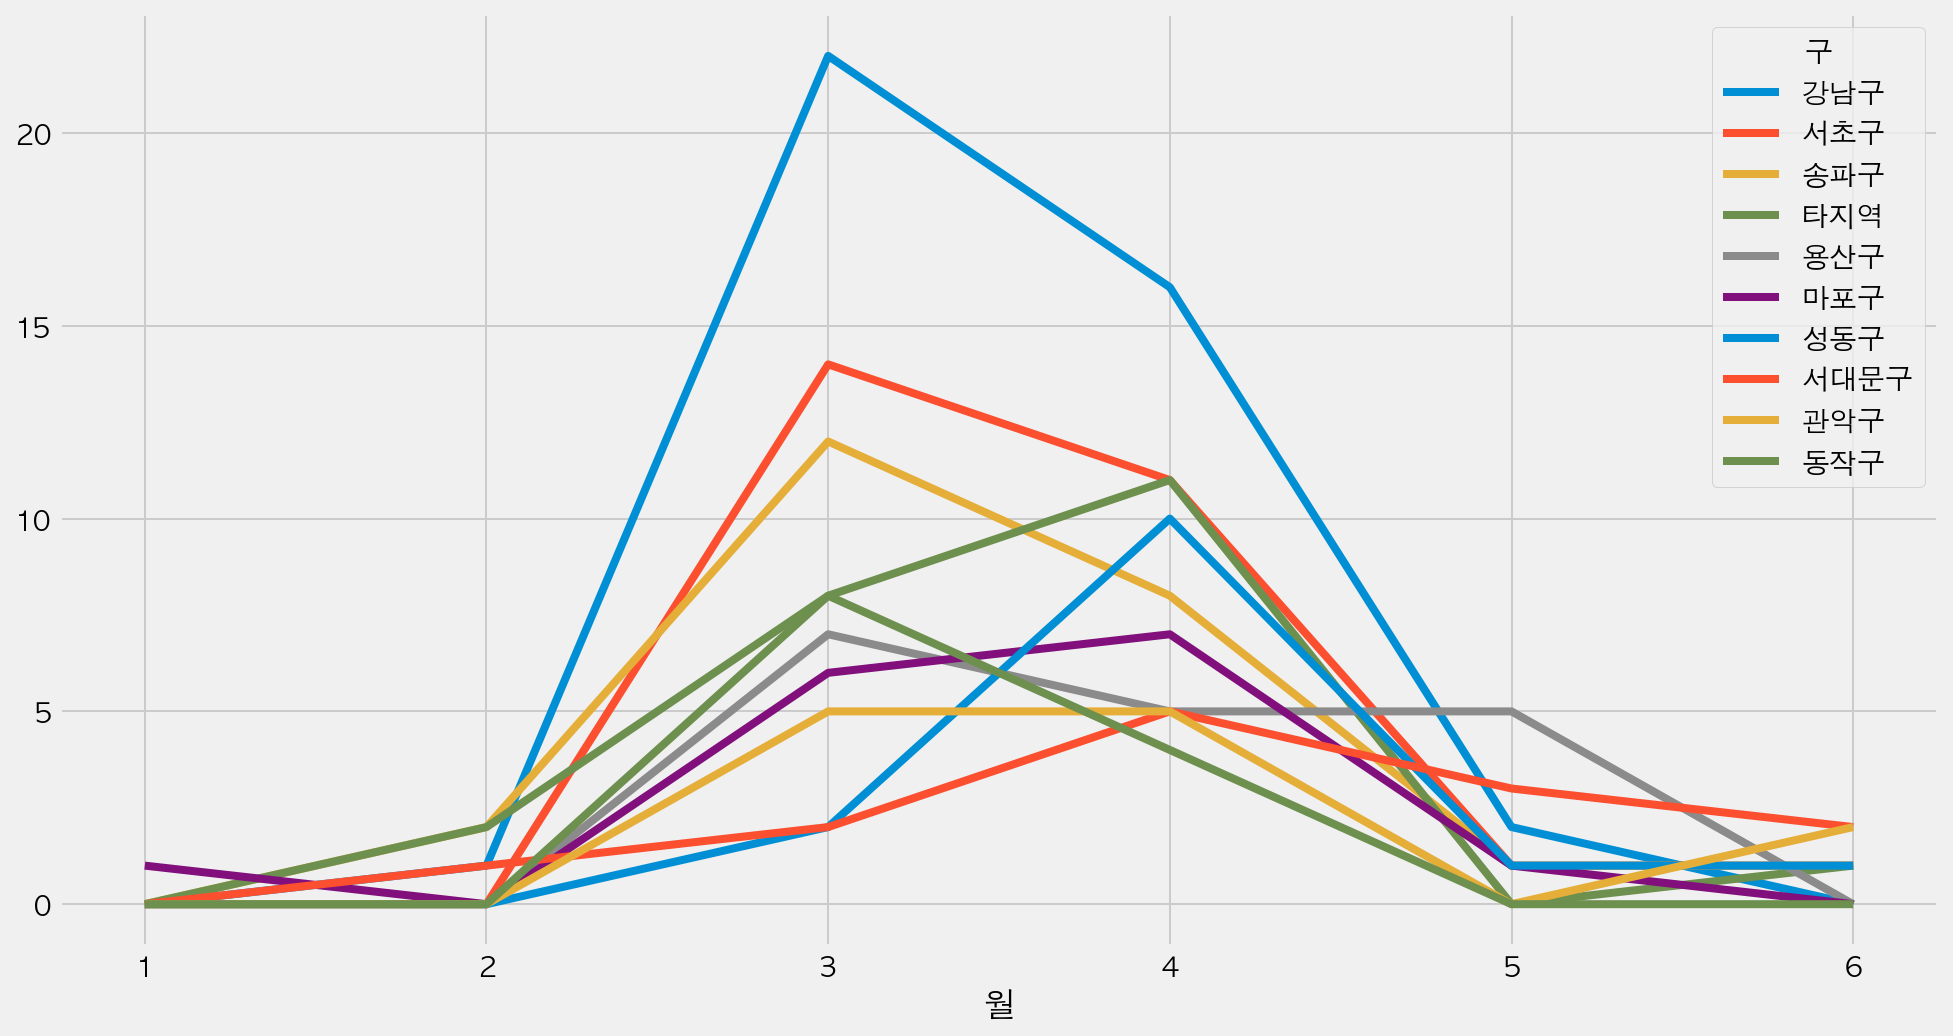

In [127]:
month_gu[top_oversea_gu].plot(figsize=(15, 8))

### 구별 해외유입 국가 분석하기

In [128]:
group_oversea_gu = df_oversea.groupby(
    ["해외", "구"])["환자"].count().unstack()
group_oversea_gu.fillna(0)

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,
UAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
남미,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
러시아,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
말레이시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
미국,22.0,4.0,1.0,4.0,4.0,2.0,1.0,0.0,2.0,3.0,...,6.0,11.0,3.0,2.0,4.0,1.0,3.0,0.0,4.0,11.0
방글라데시,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
베트남,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
싱가포르,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
유럽,13.0,4.0,0.0,1.0,5.0,4.0,0.0,0.0,3.0,5.0,...,4.0,8.0,0.0,5.0,5.0,3.0,1.0,0.0,0.0,5.0


In [129]:
group_oversea_gu = pd.pivot_table(
    data=df_oversea, 
    index="해외", 
    columns="구", values="연번", 
    aggfunc="count", fill_value=0)
group_oversea_gu

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,
UAE,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
남미,2,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,2,0,1,0,2
러시아,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미국,22,4,1,4,4,2,1,0,2,3,...,6,11,3,2,4,1,3,0,4,11
방글라데시,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
베트남,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
싱가포르,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
유럽,13,4,0,1,5,4,0,0,3,5,...,4,8,0,5,5,3,1,0,0,5


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [130]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?
gu_3 = group_oversea_gu[["강남구", "서초구", "송파구"]]
gu_3.dropna(how="all").fillna(0).astype(int)

구,강남구,서초구,송파구
해외,,,
UAE,0,0,1
남미,2,1,1
러시아,1,0,0
말레이시아,0,0,0
미국,22,15,11
방글라데시,1,0,0
베트남,0,0,0
싱가포르,0,0,1
유럽,13,10,8


In [131]:
# top_oversea_gu 에 따른 확진수 보기

group_oversea_gu[top_oversea_gu]

구,강남구,서초구,송파구,타지역,용산구,마포구,성동구,서대문구,관악구,동작구
해외,,,,,,,,,,
UAE,0,0,1,0,0,0,0,1,0,0
남미,2,1,1,2,0,2,1,1,0,0
러시아,1,0,0,0,0,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0
미국,22,15,11,11,4,5,9,3,4,3
방글라데시,1,0,0,0,0,0,0,0,0,0
베트남,0,0,0,0,0,0,0,0,0,0
싱가포르,0,0,1,0,0,0,0,0,0,0
유럽,13,10,8,5,5,4,2,4,5,5


### 최근 데이터를 불러와 실습해 보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!